# thoughts

###39天作为 gap
3.12 - 4.19  验证集 1
2016.4.23 - 2016.5.31 第二个验证集




###39天作为 gap
3.12 - 4.19  验证集 1
2016.4.23 - 2016.5.31 第二个验证集




###39天作为 gap
3.12 - 4.19  验证集 1
2016.4.23 - 2016.5.31 第二个验证集




###39天作为 gap
3.12 - 4.19  验证集 1
2016.4.23 - 2016.5.31 第二个验证集




# base 

In [2]:
from sklearn.model_selection import GroupKFold

## data read 

In [25]:
"""
Contributions from:
DSEverything - Mean Mix - Math, Geo, Harmonic (LB 0.493) 
https://www.kaggle.com/dongxu027/mean-mix-math-geo-harmonic-lb-0-493
JdPaletto - Surprised Yet? - Part2 - (LB: 0.503)
https://www.kaggle.com/jdpaletto/surprised-yet-part2-lb-0-503
hklee - weighted mean comparisons, LB 0.497, 1ST
https://www.kaggle.com/zeemeen/weighted-mean-comparisons-lb-0-497-1st

Also all comments for changes, encouragement, and forked scripts rock

Keep the Surprise Going
"""

import glob
import re
import numpy as np
import pandas as pd
from sklearn import *
from datetime import datetime

air_visit_data=pd.read_csv('./data/air_visit_data.csv')
air_store_info=pd.read_csv('./data/air_store_info.csv')
hpg_store_info=pd.read_csv('./data/hpg_store_info.csv')
air_reserve=pd.read_csv('./data/air_reserve.csv')
hpg_reserve=pd.read_csv('./data/hpg_reserve.csv')
store_id_relation=pd.read_csv('./data/store_id_relation.csv')
sample_submission=pd.read_csv('./data/sample_submission.csv')
date_info=pd.read_csv('./data/date_info.csv').rename(columns={'calendar_date': 'visit_date'})
hpg_reserve=pd.merge(hpg_reserve, store_id_relation, how='inner', on=['hpg_store_id'])
hpg_store_info=pd.merge(hpg_store_info, store_id_relation, how='inner', on=['hpg_store_id'])

In [26]:
date_info=pd.read_csv('./data/date_info.csv').rename(columns={'calendar_date': 'visit_date'})
date_info['visit_date'] = lookup(date_info['visit_date'])

In [27]:
sample_submission['visit_date'] = lookup(sample_submission.id.map(lambda x:x.split("_")[2]))
sample_submission['air_store_id'] = sample_submission.id.map(lambda x:"_".join(x.split("_")[:2]))

In [28]:
air_visit_data['visit_date']=lookup(air_visit_data['visit_date'])
air_reserve['visit_datetime']=lookup(air_reserve['visit_datetime'])
air_reserve['reserve_datetime']=lookup(air_reserve['reserve_datetime'])
hpg_reserve['visit_datetime']=lookup(hpg_reserve['visit_datetime'])
hpg_reserve['reserve_datetime']=lookup(hpg_reserve['reserve_datetime'])

In [30]:
air_visit_data['set'] = "train"
sample_submission['set']='test'
all_data = pd.concat([air_visit_data,sample_submission],axis=0)
all_data.loc[(all_data.visit_date >= pd.to_datetime("20170312")) &(all_data.visit_date <= pd.to_datetime("20170419")),'set'] = 'val'

In [31]:
all_data.groupby('set').count()

,air_store_id,id,visit_date,visitors
set,,,,
test,32019,32019,32019,32019
train,224380,0,224380,224380
val,27728,0,27728,27728


In [32]:
hpg_store_info.rename(columns = {"hpg_area_name":"air_area_name","hpg_genre_name":"air_genre_name"},inplace=True)

In [33]:
hpg_reserve.drop("hpg_store_id",axis=1,inplace=True)
hpg_store_info.drop("hpg_store_id",axis=1,inplace=True)

In [34]:
store_info = air_store_info

In [35]:
store_info['area_fir'] = store_info.air_area_name.map(lambda x:x.split(" ")[0])
store_info['area_sec'] = store_info.air_area_name.map(lambda x:x.split(" ")[1])
store_info['area_third'] = store_info.air_area_name.map(lambda x:x.split(" ")[2])

In [36]:
import Geohash as geo
store_info['geohash'] = store_info.apply(lambda x:geo.encode(x.latitude,x.longitude,7),axis=1)

In [37]:
date_info.dtypes

visit_date     datetime64[ns]
day_of_week            object
holiday_flg             int64
dtype: object

In [38]:
reserve = pd.concat([air_reserve,hpg_reserve])

In [39]:
reserve['hour_gap'] = reserve['visit_datetime'].sub(reserve['reserve_datetime'])
reserve['hour_gap'] = reserve['hour_gap'].apply(lambda x: x/np.timedelta64(1,'h'))
reserve['visit_date']=reserve['visit_datetime']

In [40]:
#reserve.drop(["hpg_store_id","visit_datetime"],axis=1,inplace=True)

In [41]:
all_data.head()

,air_store_id,id,set,visit_date,visitors
0,air_ba937bf13d40fb24,NaN,train,2016-01-13,25
1,air_ba937bf13d40fb24,NaN,train,2016-01-14,32
2,air_ba937bf13d40fb24,NaN,train,2016-01-15,29
3,air_ba937bf13d40fb24,NaN,train,2016-01-16,22
4,air_ba937bf13d40fb24,NaN,train,2016-01-18,6


### data_trim

## my feature eng

### time series 

In [42]:
all_data['day'] = all_data.visit_date.dt.day
all_data['week'] = all_data.visit_date.dt.week
all_data['month'] = all_data.visit_date.dt.month
all_data['year'] = all_data.visit_date.dt.year
all_data['dow'] = all_data.visit_date.dt.dayofweek
all_data['doy'] = all_data.visit_date.dt.dayofyear

In [15]:
all_data.head()

NameError: name 'all_data' is not defined

In [16]:
all_data.groupby('set').count()

NameError: name 'all_data' is not defined

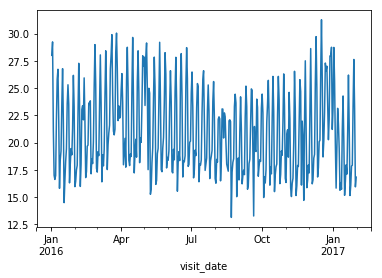

In [1206]:
all_data[(all_data['visit_date']>pd.to_datetime('20160101'))&(all_data['visit_dae']<pd.to_datetime('20170201'))].groupby('visit_date')['visitors'].mean().plot()

### reserve feature

In [17]:
reserve.head()

,air_store_id,reserve_datetime,reserve_visitors,visit_datetime
0,air_877f79706adbfb06,2016-01-01 16:00:00,1,2016-01-01 19:00:00
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,3,2016-01-01 19:00:00
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,6,2016-01-01 19:00:00
3,air_877f79706adbfb06,2016-01-01 16:00:00,2,2016-01-01 20:00:00
4,air_db80363d35f10926,2016-01-01 01:00:00,5,2016-01-01 20:00:00


In [18]:
reserve['reserve_-12_h'] = np.where(reserve['hour_gap'] <= 12,
                                    reserve['reserve_visitors'], 0)
reserve['reserve_12_37_h'] = np.where((reserve['hour_gap'] <= 37) & (reserve['hour_gap'] > 12),
                                       reserve['reserve_visitors'], 0)
reserve['reserve_37_59_h'] = np.where((reserve['hour_gap'] <= 59) & (reserve['hour_gap'] > 37),
                                       reserve['reserve_visitors'], 0)
reserve['reserve_59_85_h'] = np.where((reserve['hour_gap'] <= 85) & (reserve['hour_gap'] > 59),
                                       reserve['reserve_visitors'], 0)
reserve['reserve_85+_h'] = np.where((reserve['hour_gap'] > 85),
                                     reserve['reserve_visitors'], 0)

# group by air_store_id and visit_date to enable joining with main table
group_list = ['air_store_id', 'visit_date', 'reserve_visitors', 'reserve_-12_h',
              'reserve_12_37_h', 'reserve_37_59_h', 'reserve_59_85_h', 'reserve_85+_h']
# reserve = reserve[group_list].groupby(['air_store_id', 'visit_date'], as_index = False).sum()

KeyError: 'hour_gap'

In [ ]:
reserve['visit_date'] = lookup(reserve['visit_date'].apply(lambda x:x.strftime('%Y-%m-%d')))

In [ ]:
reserve.head()

In [ ]:
reserve.columns

In [19]:
reserve_group = reserve.groupby(['air_store_id','visit_date'])[u'air_store_id', u'reserve_visitors',
        u'reserve_-12_h',
       u'reserve_12_37_h', u'reserve_37_59_h', u'reserve_59_85_h',
       u'reserve_85+_h'].sum()

KeyError: 'visit_date'

In [1098]:
reserve_group['gap'] = reserve.groupby(['air_store_id','visit_date'])['hour_gap'].mean()

In [1099]:
reserve_group.head()

reserve_visitors 
 reserve_-12_h 
 reserve_12_37_h 
 reserve_37_59_h 
 reserve_59_85_h 
 reserve_85+_h 
 gap 
 
 
 air_store_id 
 visit_date 
 
 
 
 
 
 
 
 
 
 
 
 air_00a91d42b08b08d9 
 2016-01-14 
 2 
 0 
 0 
 0 
 2 
 0 
 77.0 
 
 
 2016-01-15 
 4 
 0 
 0 
 0 
 0 
 4 
 142.0 
 
 
 2016-01-16 
 2 
 0 
 0 
 0 
 2 
 0 
 70.0 
 
 
 2016-01-22 
 2 
 0 
 0 
 0 
 2 
 0 
 82.0 
 
 
 2016-01-29 
 5 
 0 
 0 
 0 
 0 
 5 
 144.0

### store info

In [1100]:
store_info.head()

,air_store_id,air_genre_name,air_area_name,latitude,longitude,area_fir,area_sec,area_third,geohash
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,Hyōgo-ken,Kōbe-shi,Kumoidōri,xn0jks0
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,Hyōgo-ken,Kōbe-shi,Kumoidōri,xn0jks0
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,Hyōgo-ken,Kōbe-shi,Kumoidōri,xn0jks0
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,Hyōgo-ken,Kōbe-shi,Kumoidōri,xn0jks0
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,Tōkyō-to,Minato-ku,Shibakōen,xn76u5k


### holiday

In [1101]:
date_info.head()

,visit_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1
3,2016-01-04,Monday,0
4,2016-01-05,Tuesday,0


In [1153]:
all_data = all_data\
.merge(reserve_group.reset_index(),on=['air_store_id','visit_date'],how='left')\
.merge(store_info,on=['air_store_id'])\
.merge(date_info,on=['visit_date'])

### agg feature 

In [ ]:
all_data = all_data\
.merge(reserve_group.reset_index(),on=['air_store_id','visit_date'],how='left')\
.merge(store_info,on=['air_store_id'])\
.merge(date_info,on=['visit_date'])

In [1154]:
all_data.head()

,air_store_id,id,set,visit_date,visitors,day,week,month,year,dow,doy,reserve_visitors,reserve_-12_h,reserve_12_37_h,reserve_37_59_h,reserve_59_85_h,reserve_85+_h,gap,air_genre_name,air_area_name,latitude,longitude,area_fir,area_sec,area_third,geohash,day_of_week,holiday_flg
0,air_ba937bf13d40fb24,NaN,train,2016-01-13,25,13,2,1,2016,2,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,Tōkyō-to,Minato-ku,Shibakōen,xn76u5k,Wednesday,0
1,air_25e9888d30b386df,NaN,train,2016-01-13,21,13,2,1,2016,2,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Izakaya,Tōkyō-to Shinagawa-ku Higashigotanda,35.626568,139.725858,Tōkyō-to,Shinagawa-ku,Higashigotanda,xn76et9,Wednesday,0
2,air_fd6aac1043520e83,NaN,train,2016-01-13,40,13,2,1,2016,2,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Izakaya,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,Tōkyō-to,Minato-ku,Shibakōen,xn76u5k,Wednesday,0
3,air_64d4491ad8cdb1c6,NaN,train,2016-01-13,5,13,2,1,2016,2,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,Tōkyō-to,Minato-ku,Shibakōen,xn76u5k,Wednesday,0
4,air_ee3a01f0c71a769f,NaN,train,2016-01-13,18,13,2,1,2016,2,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cafe/Sweets,Shizuoka-ken Hamamatsu-shi Motoshirochō,34.710895,137.725940,Shizuoka-ken,Hamamatsu-shi,Motoshirochō,xn1vqnb,Wednesday,0


In [1155]:
all_data['order_id'] = all_data['air_store_id']
# all_data['week_of_month'] = (all_data.day/7).astype(int)

In [1156]:
grp_cols = ['air_store_id']
all_data = all_data.merge(get_stats_target(all_data[all_data.set=="train"],grp_cols,['visitors'],drop_count=False,filter_count=0,prefix='dow_store').reset_index(),
               on = grp_cols)

prefix is dow_store,group column is air_store_id,agg total count is 829; after filter , agg total count is 829, filter ratio is 0.00120625806685 %


In [1169]:
grp_features = []
grp_features = grp_features + [x for x in all_data.columns if "by" in x ]

In [1105]:
grp_features

[['dow_store__visitors__mean_by__air_store_id',
  'dow_store__visitors__median_by__air_store_id',
  'dow_store__visitors__max_by__air_store_id',
  'dow_store__visitors__min_by__air_store_id',
  'dow_store__visitors__std_by__air_store_id',
  'dow_store__visitors__skew_by__air_store_id',
  'dow_store__visitors__sem_by__air_store_id',
  'dow_store__visitors__var_by__air_store_id',
  'dow_store__order_id__count_by__air_store_id']]

In [1196]:
basic_features = [
       u'week', u'month', u'dow']

### lag feature 

### merge

In [986]:
reserve_group.head()

reserve_visitors 
 reserve_-12_h 
 reserve_12_37_h 
 reserve_37_59_h 
 reserve_59_85_h 
 reserve_85+_h 
 gap 
 
 
 air_store_id 
 visit_date 
 
 
 
 
 
 
 
 
 
 
 
 air_00a91d42b08b08d9 
 2016-01-14 
 2 
 0 
 0 
 0 
 2 
 0 
 77.0 
 
 
 2016-01-15 
 4 
 0 
 0 
 0 
 0 
 4 
 142.0 
 
 
 2016-01-16 
 2 
 0 
 0 
 0 
 2 
 0 
 70.0 
 
 
 2016-01-22 
 2 
 0 
 0 
 0 
 2 
 0 
 82.0 
 
 
 2016-01-29 
 5 
 0 
 0 
 0 
 0 
 5 
 144.0

In [989]:
date_info.head()

,visit_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1
3,2016-01-04,Monday,0
4,2016-01-05,Tuesday,0


In [993]:
all_data_merge = all_data\
.merge(reserve_group.reset_index(),on=['air_store_id','visit_date'],how='left')\
.merge(store_info,on=['air_store_id'])\
.merge(date_info,on=['visit_date'])

In [994]:
len(all_data\
.merge(dow_store, on=['dow', 'air_store_id'], how='left')),len(all_data_merge)

(284127, 284127)

In [796]:
#for i in [u'day', u'week', u'month', u'year', u'dow','air_store_id','air_genre_name','air_area_name','area_fir','area_sec','area_third','geohash','day_of_week','holiday_flg']:
#    all_data_merge[i] = all_data_merge[i].astype('category')

In [797]:
all_data_merge.dtypes

air_store_id                                                object
id                                                          object
set                                                         object
visit_date                                          datetime64[ns]
visitors                                                     int64
day                                                          int64
week                                                         int64
month                                                        int64
year                                                         int64
dow                                                          int64
doy                                                          int64
order_id                                                    object
dow_store__visitors__mean_by__dow#air_store_id             float64
dow_store__visitors__median_by__dow#air_store_id           float64
dow_store__visitors__max_by__dow#air_store_id              flo

### cat

In [1180]:
g = all_data.columns.to_series().groupby(all_data_merge.dtypes).groups
g = {k.name: v for k, v in g.items()}

In [835]:
g

{'datetime64[ns]': Index([u'visit_date'], dtype='object'),
 'float64': Index([  u'dow_store__visitors__mean_by__dow#air_store_id',
        u'dow_store__visitors__median_by__dow#air_store_id',
           u'dow_store__visitors__max_by__dow#air_store_id',
           u'dow_store__visitors__min_by__dow#air_store_id',
           u'dow_store__visitors__std_by__dow#air_store_id',
          u'dow_store__visitors__skew_by__dow#air_store_id',
           u'dow_store__visitors__sem_by__dow#air_store_id',
           u'dow_store__visitors__var_by__dow#air_store_id',
         u'dow_store__order_id__count_by__dow#air_store_id',
                                        u'reserve_visitors',
                                           u'reserve_-12_h',
                                         u'reserve_12_37_h',
                                         u'reserve_37_59_h',
                                         u'reserve_59_85_h',
                                           u'reserve_85+_h',
               

In [836]:
g['object']

Index([u'air_store_id', u'id', u'set', u'order_id', u'air_genre_name',
       u'air_area_name', u'area_fir', u'area_sec', u'area_third', u'geohash',
       u'day_of_week'],
      dtype='object')

In [837]:
to_cat = all_data_merge[all_data_merge.set=='train']
to_val = all_data_merge[all_data_merge.set=='val']
to_test = all_data_merge[all_data_merge.set=='test']

In [838]:
to_cat.head()

,air_store_id,id,set,visit_date,visitors,day,week,month,year,dow,doy,order_id,dow_store__visitors__mean_by__dow#air_store_id,dow_store__visitors__median_by__dow#air_store_id,dow_store__visitors__max_by__dow#air_store_id,dow_store__visitors__min_by__dow#air_store_id,dow_store__visitors__std_by__dow#air_store_id,dow_store__visitors__skew_by__dow#air_store_id,dow_store__visitors__sem_by__dow#air_store_id,dow_store__visitors__var_by__dow#air_store_id,dow_store__order_id__count_by__dow#air_store_id,reserve_visitors,reserve_-12_h,reserve_12_37_h,reserve_37_59_h,reserve_59_85_h,reserve_85+_h,gap,air_genre_name,air_area_name,latitude,longitude,area_fir,area_sec,area_third,geohash,day_of_week,holiday_flg
0,air_ba937bf13d40fb24,NaN,train,2016-01-13,25,13,2,1,2016,2,13,air_ba937bf13d40fb24,24.500000,25.0,57.0,8.0,9.283545,0.676473,1.218989,86.184211,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,Tōkyō-to,Minato-ku,Shibakōen,xn76u5k,Wednesday,0
1,air_25e9888d30b386df,NaN,train,2016-01-13,21,13,2,1,2016,2,13,air_25e9888d30b386df,7.434783,5.5,28.0,1.0,6.393233,1.333512,0.942631,40.873430,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Izakaya,Tōkyō-to Shinagawa-ku Higashigotanda,35.626568,139.725858,Tōkyō-to,Shinagawa-ku,Higashigotanda,xn76et9,Wednesday,0
2,air_fd6aac1043520e83,NaN,train,2016-01-13,40,13,2,1,2016,2,13,air_fd6aac1043520e83,34.466667,36.0,60.0,9.0,12.028873,-0.105069,1.552921,144.693785,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Izakaya,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,Tōkyō-to,Minato-ku,Shibakōen,xn76u5k,Wednesday,0
3,air_64d4491ad8cdb1c6,NaN,train,2016-01-13,5,13,2,1,2016,2,13,air_64d4491ad8cdb1c6,15.885246,15.0,55.0,4.0,8.835720,2.028757,1.131298,78.069945,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,Tōkyō-to,Minato-ku,Shibakōen,xn76u5k,Wednesday,0
4,air_ee3a01f0c71a769f,NaN,train,2016-01-13,18,13,2,1,2016,2,13,air_ee3a01f0c71a769f,19.145455,18.0,79.0,4.0,10.866902,3.239297,1.465293,118.089562,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cafe/Sweets,Shizuoka-ken Hamamatsu-shi Motoshirochō,34.710895,137.725940,Shizuoka-ken,Hamamatsu-shi,Motoshirochō,xn1vqnb,Wednesday,0


In [945]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

cat_features = [u'air_genre_name',
       u'air_area_name', u'area_fir', u'area_sec', u'area_third', u'geohash',
       u'dow','month','week',u'holiday_flg']

for c in cat_features:
    le = LabelEncoder()
    le.fit(to_cat[c])
    to_cat[c] = le.transform(to_cat[c])
    to_val[c] = le.transform(to_val[c])
    to_test[c] = le.transform(to_test[c])
    
    
enc = OneHotEncoder()
enc.fit(to_cat[cat_features])
X_cat = enc.transform(to_cat[cat_features])
X_val_cat = enc.transform(to_val[cat_features])
X_test_cat = enc.transform(to_test[cat_features])

# X_t_cat = enc.transform(test[cat_features])

In [946]:
cat = pd.concat([pd.DataFrame(X_cat.todense()),pd.DataFrame(X_val_cat.todense()),pd.DataFrame(X_test_cat.todense())],axis=0)

In [947]:
cat = cat.reset_index()

In [948]:
len(cat),len(all_data_merge),cat.shape,all_data_merge.shape

(284127, 284127, (284127, 462), (284127, 38))

In [949]:
all_data_merge =all_data_merge.join(cat,how='inner')

In [916]:
len(cat),len(all_data_merge),cat.shape,all_data_merge.shape

(284127, 284127, (284127, 462), (284127, 500))

In [917]:
np.unique(all_data_merge[all_data_merge.set=='val'].air_genre_name)

array(['Asian', 'Bar/Cocktail', 'Cafe/Sweets', 'Creative cuisine',
       'Dining bar', 'International cuisine', 'Italian/French', 'Izakaya',
       'Japanese food', 'Karaoke/Party', 'Okonomiyaki/Monja/Teppanyaki',
       'Other', 'Western food', 'Yakiniku/Korean food'], dtype=object)

### cat feature count

In [880]:
for c in cat_features:
    d = all_data_merge[c].value_counts().to_dict()
    all_data_merge['%s_count'%c] = all_data_merge[c].apply(lambda x:d.get(x,0))
#     cat_count_features.append('%s_count'%c)

In [881]:
all_data_merge.head()

,air_store_id,id,set,visit_date,visitors,day,week,month,year,dow,doy,order_id,dow_store__visitors__mean_by__dow#air_store_id,dow_store__visitors__median_by__dow#air_store_id,dow_store__visitors__max_by__dow#air_store_id,dow_store__visitors__min_by__dow#air_store_id,dow_store__visitors__std_by__dow#air_store_id,dow_store__visitors__skew_by__dow#air_store_id,dow_store__visitors__sem_by__dow#air_store_id,dow_store__visitors__var_by__dow#air_store_id,dow_store__order_id__count_by__dow#air_store_id,reserve_visitors,reserve_-12_h,reserve_12_37_h,reserve_37_59_h,reserve_59_85_h,reserve_85+_h,gap,air_genre_name,air_area_name,latitude,longitude,area_fir,area_sec,area_third,geohash,day_of_week,holiday_flg,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849

## model train

In [1197]:
g = all_data_merge.columns.to_series().groupby(all_data_merge.dtypes).groups
g = {k.name: v for k, v in g.items()}

TypeError: data type not understood

In [1183]:
for x in list(g['object'] & basic_features):
    all_data[x]= all_data[x].astype('category')

In [1185]:
all_data.dtypes

air_store_id                                          category
id                                                      object
set                                                     object
visit_date                                      datetime64[ns]
visitors                                                 int64
day                                                      int64
week                                                     int64
month                                                    int64
year                                                     int64
dow                                                      int64
doy                                                      int64
reserve_visitors                                       float64
reserve_-12_h                                          float64
reserve_12_37_h                                        float64
reserve_37_59_h                                        float64
reserve_59_85_h                                        

### lgb

In [918]:
def lgb_rmsle_score(preds, dtrain):
    labels = np.exp(dtrain.get_label())
    preds = np.exp(preds.clip(min=0))
    return 'rmsle', np.sqrt(np.mean(np.square(np.log1p(preds)-np.log1p(labels)))), False

In [919]:
def lgb_rmsle_score(preds, dtrain):
#     labels = np.exp(dtrain.get_label())
#     preds = np.exp(preds.clip(min=0))
    return 'rmsle',metrics.mean_squared_error(dtrain.get_label(), preds.clip(min=0))**0.5 , False

In [920]:
def RMSLE(y, pred):
    return metrics.mean_squared_error(y, pred)**0.5

In [1186]:
all_data_merge = all_data

In [1187]:
train = all_data_merge[(all_data_merge.set=='train')|(all_data_merge.set=='val')]
test = all_data_merge[all_data_merge.set=='test']

In [1188]:
train.dtypes

air_store_id                                          category
id                                                      object
set                                                     object
visit_date                                      datetime64[ns]
visitors                                                 int64
day                                                      int64
week                                                     int64
month                                                    int64
year                                                     int64
dow                                                      int64
doy                                                      int64
reserve_visitors                                       float64
reserve_-12_h                                          float64
reserve_12_37_h                                        float64
reserve_37_59_h                                        float64
reserve_59_85_h                                        

In [1198]:
col = basic_features + grp_features

In [1199]:
col

[u'week',
 u'month',
 u'dow',
 'dow_store__visitors__mean_by__air_store_id',
 'dow_store__visitors__median_by__air_store_id',
 'dow_store__visitors__max_by__air_store_id',
 'dow_store__visitors__min_by__air_store_id',
 'dow_store__visitors__std_by__air_store_id',
 'dow_store__visitors__skew_by__air_store_id',
 'dow_store__visitors__sem_by__air_store_id',
 'dow_store__visitors__var_by__air_store_id',
 'dow_store__order_id__count_by__air_store_id']

In [1200]:
X_train = train[train.visit_date <= pd.to_datetime("20170311")][col]
y_train = np.log1p(train[train.visit_date <= pd.to_datetime("20170311")]["visitors"].values)
X_pub = train[(train.visit_date >= pd.to_datetime("20170312")) &(train.visit_date <= pd.to_datetime("20170318"))][col]
y_pub = np.log1p(train[(train.visit_date >= pd.to_datetime("20170312")) &(train.visit_date <= pd.to_datetime("20170318"))]["visitors"].values)
X_pvt = train[(train.visit_date >= pd.to_datetime("20170319")) &(train.visit_date <= pd.to_datetime("20170419"))][col]
y_pvt = np.log1p(train[(train.visit_date >= pd.to_datetime("20170319")) &(train.visit_date <= pd.to_datetime("20170419"))]["visitors"].values)
X_val = train[(train.visit_date >= pd.to_datetime("20170312")) &(train.visit_date <= pd.to_datetime("20170419"))][col]
y_val = np.log1p(train[(train.visit_date >= pd.to_datetime("20170312")) &(train.visit_date <= pd.to_datetime("20170419"))]["visitors"].values)
X_test = test[col]

In [1201]:
len(all_data),len(all_data_merge),len(train),len(X_train),len(y_train),len(X_val),len(y_val)

(284127, 284127, 252108, 222073, 222073, 27728, 27728)

In [1202]:
col

[u'week',
 u'month',
 u'dow',
 'dow_store__visitors__mean_by__air_store_id',
 'dow_store__visitors__median_by__air_store_id',
 'dow_store__visitors__max_by__air_store_id',
 'dow_store__visitors__min_by__air_store_id',
 'dow_store__visitors__std_by__air_store_id',
 'dow_store__visitors__skew_by__air_store_id',
 'dow_store__visitors__sem_by__air_store_id',
 'dow_store__visitors__var_by__air_store_id',
 'dow_store__order_id__count_by__air_store_id']

In [1203]:
X_train.describe()

,week,month,dow,dow_store__visitors__mean_by__air_store_id,dow_store__visitors__median_by__air_store_id,dow_store__visitors__max_by__air_store_id,dow_store__visitors__min_by__air_store_id,dow_store__visitors__std_by__air_store_id,dow_store__visitors__skew_by__air_store_id,dow_store__visitors__sem_by__air_store_id,dow_store__visitors__var_by__air_store_id,dow_store__order_id__count_by__air_store_id
count,222073.000000,222073.000000,222073.000000,222073.000000,222073.000000,222073.000000,222073.000000,222073.000000,222073.000000,222073.000000,222073.000000,222073.000000
mean,26.573181,6.571091,3.020142,20.853764,19.331195,75.615077,1.867620,11.282662,1.265471,0.672770,162.824705,301.878193
std,16.424759,3.773206,1.922991,10.535922,10.441725,66.109864,2.339323,5.960403,1.835660,0.408469,207.598090,88.031206
min,1.000000,1.000000,0.000000,1.202797,1.000000,10.000000,1.000000,0.818444,-1.669982,0.068442,0.669851,4.000000
25%,9.000000,3.000000,1.000000,11.965035,11.000000,41.000000,1.000000,6.933641,0.472323,0.405027,48.075378,224.000000
50%,29.000000,7.000000,3.000000,19.305970,17.000000,61.000000,1.000000,10.199994,0.833953,0.599005,104.039873,278.000000
75%,41.000000,10.000000,5.000000,28.306452,27.000000,90.000000,2.000000,14.426075,1.355641,0.838928,208.111635,383.000000
max,53.000000,12.000000,6.000000,105.692308,102.000000,877.000000,86.000000,47.967871,18.015752,23.983936,2300.916667,438.000000


#### prepare_features

In [1204]:
import lightgbm as lgb
MAX_ROUNDS = 500

params = {
    'num_leaves': 2**7-1,
    'objective': 'regression_l2',
#     'max_depth':6,
    'min_data_in_leaf': 10,
    'learning_rate': 0.05,
    'feature_fraction': 0.7,
#     'bagging_fraction': 0.8,
#     'bagging_freq': 2,
    'metric': 'l2_root',#'22_root'
    'num_threads': 8
}
# cate_fea = [u'dow', u'year', u'month', u'day_of_week', u'holiday_flg',u'date_int']
dtrain = lgb.Dataset(
        X_train, label=y_train
    )
dval = lgb.Dataset(
        X_val, label=y_val, reference=dtrain
    )
dpub = lgb.Dataset(
        X_pub, label=y_pub, reference=dtrain
    )
dpvt = lgb.Dataset(
        X_pvt, label=y_pvt, reference=dtrain
    )

bst = lgb.train(
        params, dtrain, num_boost_round=MAX_ROUNDS,
        valid_sets=[dtrain, dval], early_stopping_rounds=50, verbose_eval=50,
#         feval=lgb_rmsle_score
    )
# bst.pr

Training until validation scores don't improve for 50 rounds.
[50]	training's rmse: 0.5484	valid_1's rmse: 0.579523
[100]	training's rmse: 0.527723	valid_1's rmse: 0.571638
Early stopping, best iteration is:
[87]	training's rmse: 0.531318	valid_1's rmse: 0.56982


In [997]:
val_pred = bst.predict(X_val, num_iteration=bst.best_iteration or MAX_ROUNDS)
pub_pred = bst.predict(X_pub, num_iteration=bst.best_iteration or MAX_ROUNDS)
pvt_pred = bst.predict(X_pvt, num_iteration=bst.best_iteration or MAX_ROUNDS)

In [998]:
print "RMSLE val is {}, pub is {},pvt is {}".format(RMSLE(val_pred,y_val),RMSLE(pub_pred,y_pub),RMSLE(pvt_pred,y_pvt))

RMSLE val is 0.557999863639, pub is 0.524837283314,pvt is 0.565147160165


In [506]:
print "RMSLE val is {}, pub is {},pvt is {}".format(RMSLE(val_pred,y_val),RMSLE(pub_pred,y_pub),RMSLE(pvt_pred,y_pvt))

RMSLE val is 0.508906208872, pub is 0.490276154663,pvt is 0.512978360935


In [1012]:
df = pd.DataFrame({'feature': bst.feature_name(), 'importances': bst.feature_importance('gain')})
df['fscore'] = df['importances'] / df['importances'].sum()

print(df.sort_values('importances', ascending=False).to_string(index=False))
print  "-" * 20 + " features" + "-" * 20
# print [x.strip() for x in df.sort_values('importances', ascending=False).feature.to_string(index=False).split("\n")]

feature    importances    fscore
dow_store__visitors__median_by__dow#air_store_id  419780.765711  0.466169
  dow_store__visitors__mean_by__dow#air_store_id  341966.073992  0.379755
   dow_store__visitors__max_by__dow#air_store_id   63535.522428  0.070557
   dow_store__visitors__min_by__dow#air_store_id   28170.717225  0.031284
                                reserve_visitors   18864.814209  0.020949
  dow_store__visitors__skew_by__dow#air_store_id    6636.553371  0.007370
   dow_store__visitors__std_by__dow#air_store_id    6272.563605  0.006966
                                             gap    3562.172808  0.003956
                                   reserve_85+_h    3444.645525  0.003825
   dow_store__visitors__sem_by__dow#air_store_id    3300.578198  0.003665
 dow_store__order_id__count_by__dow#air_store_id    1940.992250  0.002155
   dow_store__visitors__var_by__dow#air_store_id    1305.139245  0.001449
                                   reserve_-12_h     792.964577  0.000881
     

In [508]:
print("\n".join(("%s: %.2f" % x) for x in sorted(
        zip(X_train.columns, bst.feature_importance("gain")),
        key=lambda x: x[1], reverse=True
    )))

dow_store__visitors__median_by__dow#air_store_id: 444058.77
dow_store__visitors__mean_by__dow#air_store_id: 386470.41
dow_store__visitors__min_by__dow#air_store_id: 21718.14
reserve_visitors: 17986.14
month: 5049.41
day: 3443.77
reserve_85+_h: 2402.28
dow_store__visitors__var_by__dow#air_store_id: 2155.10
dow_store__visitors__skew_by__dow#air_store_id: 1477.57
dow_store__order_id__count_by__dow#air_store_id: 1186.07
dow_store__visitors__sem_by__dow#air_store_id: 1013.06
gap: 684.11
dow: 658.39
dow_store__visitors__std_by__dow#air_store_id: 576.14
dow_store__visitors__max_by__dow#air_store_id: 284.27
reserve_-12_h: 216.93
reserve_12_37_h: 28.01
reserve_37_59_h: 22.95
reserve_59_85_h: 19.22


#### analysis

In [405]:
X_val['pred'] = val_pred

In [406]:
X_val.head()

,day,month,dow,dow_store__visitors__mean_by__dow#air_store_id,dow_store__visitors__median_by__dow#air_store_id,dow_store__visitors__max_by__dow#air_store_id,dow_store__visitors__min_by__dow#air_store_id,dow_store__visitors__std_by__dow#air_store_id,dow_store__visitors__skew_by__dow#air_store_id,dow_store__visitors__sem_by__dow#air_store_id,dow_store__visitors__var_by__dow#air_store_id,dow_store__order_id__count_by__dow#air_store_id,reserve_visitors,hour_gap,reserve_-12_h,reserve_12_37_h,reserve_37_59_h,reserve_59_85_h,reserve_85+_h,pred
352,12,3,6,3.666667,3.0,11.0,1.0,3.171846,1.391763,0.915633,10.060606,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.392045
353,13,3,0,13.754386,12.0,34.0,2.0,7.349151,0.689083,0.973419,54.010025,57.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.535243
354,14,3,1,18.580645,19.0,35.0,5.0,7.187303,0.184277,0.912788,51.657324,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.915601
355,15,3,2,23.843750,25.0,57.0,7.0,9.294509,0.661484,1.161814,86.387897,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.160283
356,16,3,3,20.292308,21.0,54.0,2.0,9.584693,0.913048,1.188835,91.866346,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.951818


In [409]:
test.head()

,air_store_id,set,visit_date,visitors,day,week,month,year,dow,doy,order_id,dow_store__visitors__mean_by__dow#air_store_id,dow_store__visitors__median_by__dow#air_store_id,dow_store__visitors__max_by__dow#air_store_id,dow_store__visitors__min_by__dow#air_store_id,dow_store__visitors__std_by__dow#air_store_id,dow_store__visitors__skew_by__dow#air_store_id,dow_store__visitors__sem_by__dow#air_store_id,dow_store__visitors__var_by__dow#air_store_id,dow_store__order_id__count_by__dow#air_store_id,reserve_datetime,reserve_visitors,visit_datetime,hour_gap,reserve_-12_h,reserve_12_37_h,reserve_37_59_h,reserve_59_85_h,reserve_85+_h
324849,air_00a91d42b08b08d9,test,2017-04-23,2.104556,23,16,4,2017,6,113,air_00a91d42b08b08d9,2.000000,2.0,2.0,2.0,NaN,NaN,NaN,NaN,1.0,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
324850,air_00a91d42b08b08d9,test,2017-04-24,18.181166,24,17,4,2017,0,114,air_00a91d42b08b08d9,22.457143,19.0,47.0,1.0,9.425693,0.792920,1.593233,88.843697,35.0,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
324851,air_00a91d42b08b08d9,test,2017-04-25,21.191134,25,17,4,2017,1,115,air_00a91d42b08b08d9,24.350000,24.5,43.0,1.0,9.093672,-0.256772,1.437836,82.694872,40.0,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
324852,air_00a91d42b08b08d9,test,2017-04-26,28.749158,26,17,4,2017,2,116,air_00a91d42b08b08d9,28.125000,28.0,52.0,15.0,8.881521,0.764552,1.404292,78.881410,40.0,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
324853,air_00a91d42b08b08d9,test,2017-04-27,30.634735,27,17,4,2017,3,117,air_00a91d42b08b08d9,29.868421,30.0,47.0,15.0,7.143968,0.002542,1.158905,51.036273,38.0,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


#### predict

In [407]:
X_all = train[col]
y_all = train['visitors']
f_num_round = bst.best_iteration or MAX_ROUNDS
print f_num_round
# f_num_round = 1000 
dtrain = lgb.Dataset(
        X_train, label=y_train,
    )
bst_all = lgb.train(
        params, dtrain, num_boost_round=f_num_round,
        valid_sets=[dtrain], early_stopping_rounds=50, verbose_eval=50,
        feval=lgb_rmsle_score
    )
test['visitors'] = bst_all.predict(
        X_test, num_iteration=f_num_round)
test['visitors'] = np.expm1(test['visitors']).clip(lower=0.)
print

177
Training until validation scores don't improve for 50 rounds.
[50]	training's rmse: 0.503874	training's rmsle: 0.503874
[100]	training's rmse: 0.492672	training's rmsle: 0.492672
[150]	training's rmse: 0.489517	training's rmsle: 0.489517


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [408]:
test[['id','visitors']].to_csv('submission_base.csv', index=False)

KeyError: "['id'] not in index"

### xgb

In [70]:
VALIDATION_START = '2017-03-12'
VALIDATION_DELTA = '42 days'
PRIVATE_START = '2017-03-19'

In [71]:
data = {
    'tra': pd.read_csv('./data/air_visit_data.csv'),
    'as': pd.read_csv('./data/air_store_info.csv'),
    'hs': pd.read_csv('./data/hpg_store_info.csv'),
    'ar': pd.read_csv('./data/air_reserve.csv'),
    'hr': pd.read_csv('./data/hpg_reserve.csv'),
    'id': pd.read_csv('./data/store_id_relation.csv'),
    'tes': pd.read_csv('./data/sample_submission.csv'),
    'hol': pd.read_csv('./data/date_info.csv').rename(columns={'calendar_date':'visit_date'})
    }

data['hr'] = pd.merge(data['hr'], data['id'], how='inner', on=['hpg_store_id'])

for df in ['ar','hr']:
    df_test = df + '_test'
    
    data[df]['visit_datetime'] = pd.to_datetime(data[df]['visit_datetime'])
    data[df]['visit_dow'] = data[df]['visit_datetime'].dt.dayofweek
    data[df]['visit_datetime'] = data[df]['visit_datetime'].dt.date
    data[df]['reserve_datetime'] = pd.to_datetime(data[df]['reserve_datetime'])
    data[df_test] = data[df][data[df]['reserve_datetime']<pd.to_datetime(VALIDATION_START)].copy()

    data[df]['reserve_datetime'] = data[df]['reserve_datetime'].dt.date
    data[df_test]['reserve_datetime'] = data[df_test]['reserve_datetime'].dt.date
    data[df]['reserve_datetime_diff'] = data[df].apply(lambda r: (r['visit_datetime'] - r['reserve_datetime']).days, axis=1)
    data[df_test]['reserve_datetime_diff'] = data[df_test].apply(lambda r: (r['visit_datetime'] - r['reserve_datetime']).days, axis=1)

    # Exclude same-week reservations from training set
    data[df] = data[df][data[df]['reserve_datetime_diff'] > data[df]['visit_dow']]

    tmp1 = data[df].groupby(['air_store_id','visit_datetime'], as_index=False)[['reserve_datetime_diff', 'reserve_visitors']].sum().rename(columns={'visit_datetime':'visit_date', 'reserve_datetime_diff': 'rs1', 'reserve_visitors':'rv1'})
    tmp2 = data[df].groupby(['air_store_id','visit_datetime'], as_index=False)[['reserve_datetime_diff', 'reserve_visitors']].mean().rename(columns={'visit_datetime':'visit_date', 'reserve_datetime_diff': 'rs2', 'reserve_visitors':'rv2'})
    data[df] = pd.merge(tmp1, tmp2, how='inner', on=['air_store_id','visit_date'])
    
    tmp1 = data[df_test].groupby(['air_store_id','visit_datetime'], as_index=False)[['reserve_datetime_diff', 'reserve_visitors']].sum().rename(columns={'visit_datetime':'visit_date', 'reserve_datetime_diff': 'rs1', 'reserve_visitors':'rv1'})
    tmp2 = data[df_test].groupby(['air_store_id','visit_datetime'], as_index=False)[['reserve_datetime_diff', 'reserve_visitors']].mean().rename(columns={'visit_datetime':'visit_date', 'reserve_datetime_diff': 'rs2', 'reserve_visitors':'rv2'})
    data[df_test] = pd.merge(tmp1, tmp2, how='inner', on=['air_store_id','visit_date'])
    

data['tra']['visit_date'] = pd.to_datetime(data['tra']['visit_date'])
actuals = data['tra'][data['tra']['visit_date'] >= pd.to_datetime(VALIDATION_START)].copy()
actuals['id'] = actuals['air_store_id'] + '_' + actuals['visit_date'].dt.strftime('%Y-%m-%d')
actuals.drop(['air_store_id','visit_date'],axis=1,inplace=True)
data['tra'] = data['tra'][data['tra']['visit_date'] < pd.to_datetime(VALIDATION_START)]
data['tra']['dow'] = data['tra']['visit_date'].dt.dayofweek
data['tra']['year'] = data['tra']['visit_date'].dt.year
data['tra']['month'] = data['tra']['visit_date'].dt.month
data['tra']['visit_date'] = data['tra']['visit_date'].dt.date

data['tes']['visit_date'] = data['tes']['id'].map(lambda x: str(x).split('_')[2])
data['tes']['air_store_id'] = data['tes']['id'].map(lambda x: '_'.join(x.split('_')[:2]))
# Replace with validation data
data['tes']['visit_date'] = pd.to_datetime(data['tes']['visit_date']) - pd.Timedelta(VALIDATION_DELTA)
is_public = data['tes']['visit_date'] < PRIVATE_START
data['tes']['dow'] = data['tes']['visit_date'].dt.dayofweek
data['tes']['year'] = data['tes']['visit_date'].dt.year
data['tes']['month'] = data['tes']['visit_date'].dt.month
data['tes']['visit_date'] = data['tes']['visit_date'].dt.date
data['tes']['id'] = data['tes']['air_store_id'] + '_' + pd.to_datetime(data['tes']['visit_date']).dt.strftime('%Y-%m-%d')

actuals = data['tes'][['id']].merge(actuals,on='id',how='left')
weights = 1 - 1*actuals['visitors'].isnull()
actuals = actuals.fillna(-.99)

unique_stores = data['tes']['air_store_id'].unique()
stores = pd.concat([pd.DataFrame({'air_store_id': unique_stores, 'dow': [i]*len(unique_stores)}) for i in range(7)], axis=0, ignore_index=True).reset_index(drop=True)

#sure it can be compressed...
tmp = data['tra'].groupby(['air_store_id','dow'], as_index=False)['visitors'].min().rename(columns={'visitors':'min_visitors'})
stores = pd.merge(stores, tmp, how='left', on=['air_store_id','dow']) 
tmp = data['tra'].groupby(['air_store_id','dow'], as_index=False)['visitors'].mean().rename(columns={'visitors':'mean_visitors'})
stores = pd.merge(stores, tmp, how='left', on=['air_store_id','dow'])
tmp = data['tra'].groupby(['air_store_id','dow'], as_index=False)['visitors'].median().rename(columns={'visitors':'median_visitors'})
stores = pd.merge(stores, tmp, how='left', on=['air_store_id','dow'])
tmp = data['tra'].groupby(['air_store_id','dow'], as_index=False)['visitors'].max().rename(columns={'visitors':'max_visitors'})
stores = pd.merge(stores, tmp, how='left', on=['air_store_id','dow'])
tmp = data['tra'].groupby(['air_store_id','dow'], as_index=False)['visitors'].count().rename(columns={'visitors':'count_observations'})
stores = pd.merge(stores, tmp, how='left', on=['air_store_id','dow']) 

stores = pd.merge(stores, data['as'], how='left', on=['air_store_id']) 
# NEW FEATURES FROM Georgii Vyshnia
stores['air_genre_name'] = stores['air_genre_name'].map(lambda x: str(str(x).replace('/',' ')))
stores['air_area_name'] = stores['air_area_name'].map(lambda x: str(str(x).replace('-',' ')))
lbl = preprocessing.LabelEncoder()
for i in range(10):
    stores['air_genre_name'+str(i)] = lbl.fit_transform(stores['air_genre_name'].map(lambda x: str(str(x).split(' ')[i]) if len(str(x).split(' '))>i else ''))
    stores['air_area_name'+str(i)] = lbl.fit_transform(stores['air_area_name'].map(lambda x: str(str(x).split(' ')[i]) if len(str(x).split(' '))>i else ''))
stores['air_genre_name'] = lbl.fit_transform(stores['air_genre_name'])
stores['air_area_name'] = lbl.fit_transform(stores['air_area_name'])

data['hol']['visit_date'] = pd.to_datetime(data['hol']['visit_date'])
data['hol']['day_of_week'] = lbl.fit_transform(data['hol']['day_of_week'])
data['hol']['visit_date'] = data['hol']['visit_date'].dt.date
train = pd.merge(data['tra'], data['hol'], how='left', on=['visit_date']) 
test = pd.merge(data['tes'], data['hol'], how='left', on=['visit_date']) 

train = pd.merge(train, stores, how='inner', on=['air_store_id','dow']) 
test = pd.merge(test, stores, how='left', on=['air_store_id','dow'])

for df in ['ar','hr']:
    train = pd.merge(train, data[df], how='left', on=['air_store_id','visit_date']) 
    test = pd.merge(test, data[df_test], how='left', on=['air_store_id','visit_date'])

train['id'] = train.apply(lambda r: '_'.join([str(r['air_store_id']), str(r['visit_date'])]), axis=1)

train['total_reserv_sum'] = train['rv1_x'] + train['rv1_y']
train['total_reserv_mean'] = (train['rv2_x'] + train['rv2_y']) / 2
train['total_reserv_dt_diff_mean'] = (train['rs2_x'] + train['rs2_y']) / 2

test['total_reserv_sum'] = test['rv1_x'] + test['rv1_y']
test['total_reserv_mean'] = (test['rv2_x'] + test['rv2_y']) / 2
test['total_reserv_dt_diff_mean'] = (test['rs2_x'] + test['rs2_y']) / 2

# NEW FEATURES FROM JMBULL
train['date_int'] = train['visit_date'].apply(lambda x: x.strftime('%Y%m%d')).astype(int)
test['date_int'] = test['visit_date'].apply(lambda x: x.strftime('%Y%m%d')).astype(int)
train['var_max_lat'] = train['latitude'].max() - train['latitude']
train['var_max_long'] = train['longitude'].max() - train['longitude']
test['var_max_lat'] = test['latitude'].max() - test['latitude']
test['var_max_long'] = test['longitude'].max() - test['longitude']

# NEW FEATURES FROM Georgii Vyshnia
train['lon_plus_lat'] = train['longitude'] + train['latitude'] 
test['lon_plus_lat'] = test['longitude'] + test['latitude']

lbl = preprocessing.LabelEncoder()
train['air_store_id2'] = lbl.fit_transform(train['air_store_id'])
test['air_store_id2'] = lbl.transform(test['air_store_id'])

col = [c for c in train if c not in ['id', 'air_store_id', 'visit_date','visitors']]
train = train.fillna(-1)
test = test.fillna(-1)

In [78]:
[c for c in train if c not in ['id', 'air_store_id', 'visit_date','visitors']]

['dow',
 'year',
 'month',
 'day_of_week',
 'holiday_flg',
 'min_visitors',
 'mean_visitors',
 'median_visitors',
 'max_visitors',
 'count_observations',
 'air_genre_name',
 'air_area_name',
 'latitude',
 'longitude',
 'air_genre_name0',
 'air_area_name0',
 'air_genre_name1',
 'air_area_name1',
 'air_genre_name2',
 'air_area_name2',
 'air_genre_name3',
 'air_area_name3',
 'air_genre_name4',
 'air_area_name4',
 'air_genre_name5',
 'air_area_name5',
 'air_genre_name6',
 'air_area_name6',
 'air_genre_name7',
 'air_area_name7',
 'air_genre_name8',
 'air_area_name8',
 'air_genre_name9',
 'air_area_name9',
 'rs1_x',
 'rv1_x',
 'rs2_x',
 'rv2_x',
 'rs1_y',
 'rv1_y',
 'rs2_y',
 'rv2_y',
 'total_reserv_sum',
 'total_reserv_mean',
 'total_reserv_dt_diff_mean',
 'date_int',
 'var_max_lat',
 'var_max_long',
 'lon_plus_lat',
 'air_store_id2']

In [75]:
from xgboost import XGBRegressor

def RMSLE(y, pred):
    return metrics.mean_squared_error(y, pred)**0.5
    
# model1 = ensemble.GradientBoostingRegressor(learning_rate=0.2, random_state=3, n_estimators=200, subsample=0.8, 
#                       max_depth =10)
# model2 = neighbors.KNeighborsRegressor(n_jobs=-1, n_neighbors=4)
model3 = XGBRegressor(learning_rate=0.2, random_state=3, n_estimators=200, subsample=0.8, 
                      colsample_bytree=0.8, max_depth =10)

# model1.fit(train[col], np.log1p(train['visitors'].values))
# model2.fit(train[col], np.log1p(train['visitors'].values))
model3.fit(train[col], np.log1p(train['visitors'].values))

# preds1 = model1.predict(train[col])
# preds2 = model2.predict(train[col])
preds3 = model3.predict(actuals[col])

# print('RMSE GradientBoostingRegressor: ', RMSLE(np.log1p(train['visitors'].values), preds1))
# print('RMSE KNeighborsRegressor: ', RMSLE(np.log1p(train['visitors'].values), preds2))
print('RMSE XGBRegressor: ', RMSLE(np.log1p(actuals['visitors'].values), preds3))

('RMSE XGBRegressor: ', 0.4417738272228623)


In [81]:
actuals.head()

,id,visitors
0,air_00a91d42b08b08d9_2017-03-12,-0.99
1,air_00a91d42b08b08d9_2017-03-13,39.00
2,air_00a91d42b08b08d9_2017-03-14,28.00
3,air_00a91d42b08b08d9_2017-03-15,42.00
4,air_00a91d42b08b08d9_2017-03-16,39.00


In [80]:
preds3 = model3.predict(actuals[col])

# print('RMSE GradientBoostingRegressor: ', RMSLE(np.log1p(train['visitors'].values), preds1))
# print('RMSE KNeighborsRegressor: ', RMSLE(np.log1p(train['visitors'].values), preds2))
print('RMSE XGBRegressor: ', RMSLE(np.log1p(actuals['visitors'].values), preds3))

KeyError: "['dow' 'year' 'month' 'day_of_week' 'holiday_flg' 'min_visitors'\n 'mean_visitors' 'median_visitors' 'max_visitors' 'count_observations'\n 'air_genre_name' 'air_area_name' 'latitude' 'longitude' 'air_genre_name0'\n 'air_area_name0' 'air_genre_name1' 'air_area_name1' 'air_genre_name2'\n 'air_area_name2' 'air_genre_name3' 'air_area_name3' 'air_genre_name4'\n 'air_area_name4' 'air_genre_name5' 'air_area_name5' 'air_genre_name6'\n 'air_area_name6' 'air_genre_name7' 'air_area_name7' 'air_genre_name8'\n 'air_area_name8' 'air_genre_name9' 'air_area_name9' 'rs1_x' 'rv1_x'\n 'rs2_x' 'rv2_x' 'rs1_y' 'rv1_y' 'rs2_y' 'rv2_y' 'total_reserv_sum'\n 'total_reserv_mean' 'total_reserv_dt_diff_mean' 'date_int' 'var_max_lat'\n 'var_max_long' 'lon_plus_lat' 'air_store_id2'] not in index"

In [79]:
len(test['visitors'])

32019

In [77]:
test['visitors'] = preds3
test['visitors'] = np.expm1(test['visitors']).clip(lower=0.)

ValueError: Length of values does not match length of index

In [77]:
lbl = preprocessing.LabelEncoder()
train['air_store_id2'] = lbl.fit_transform(train['air_store_id'])
test['air_store_id2'] = lbl.transform(test['air_store_id'])

col = [c for c in train if c not in ['id', 'air_store_id', 'visit_date','visitors']]
train = train.fillna(-1)
test = test.fillna(-1)

def RMSLE(y, pred):
    return metrics.mean_squared_error(y, pred)**0.5
    
model1 = ensemble.GradientBoostingRegressor(learning_rate=0.2, random_state=3, n_estimators=200, subsample=0.8, 
                      max_depth =10)
model2 = neighbors.KNeighborsRegressor(n_jobs=-1, n_neighbors=4)
model3 = XGBRegressor(learning_rate=0.2, random_state=3, n_estimators=200, subsample=0.8, 
                      colsample_bytree=0.8, max_depth =10)

model1.fit(train[col], np.log1p(train['visitors'].values))
model2.fit(train[col], np.log1p(train['visitors'].values))
model3.fit(train[col], np.log1p(train['visitors'].values))

preds1 = model1.predict(train[col])
preds2 = model2.predict(train[col])
preds3 = model3.predict(train[col])

print('RMSE GradientBoostingRegressor: ', RMSLE(np.log1p(train['visitors'].values), preds1))
print('RMSE KNeighborsRegressor: ', RMSLE(np.log1p(train['visitors'].values), preds2))
print('RMSE XGBRegressor: ', RMSLE(np.log1p(train['visitors'].values), preds3))
preds1 = model1.predict(test[col])
preds2 = model2.predict(test[col])
preds3 = model3.predict(test[col])

test['visitors'] = 0.3*preds1+0.3*preds2+0.4*preds3
test['visitors'] = np.expm1(test['visitors']).clip(lower=0.)
sub1 = test[['id','visitors']].copy()
del train; del data;

# from hklee
# https://www.kaggle.com/zeemeen/weighted-mean-comparisons-lb-0-497-1st/code
dfs = { re.search('/([^/\.]*)\.csv', fn).group(1):
    pd.read_csv(fn)for fn in glob.glob('../input/*.csv')}

for k, v in dfs.items(): locals()[k] = v

wkend_holidays = date_info.apply(
    (lambda x:(x.day_of_week=='Sunday' or x.day_of_week=='Saturday') and x.holiday_flg==1), axis=1)
date_info.loc[wkend_holidays, 'holiday_flg'] = 0
date_info['weight'] = ((date_info.index + 1) / len(date_info)) ** 5  

visit_data = air_visit_data.merge(date_info, left_on='visit_date', right_on='calendar_date', how='left')
visit_data.drop('calendar_date', axis=1, inplace=True)
visit_data['visitors'] = visit_data.visitors.map(pd.np.log1p)

wmean = lambda x:( (x.weight * x.visitors).sum() / x.weight.sum() )
visitors = visit_data.groupby(['air_store_id', 'day_of_week', 'holiday_flg']).apply(wmean).reset_index()
visitors.rename(columns={0:'visitors'}, inplace=True) # cumbersome, should be better ways.

sample_submission['air_store_id'] = sample_submission.id.map(lambda x: '_'.join(x.split('_')[:-1]))
sample_submission['calendar_date'] = sample_submission.id.map(lambda x: x.split('_')[2])
sample_submission.drop('visitors', axis=1, inplace=True)
sample_submission = sample_submission.merge(date_info, on='calendar_date', how='left')
sample_submission = sample_submission.merge(visitors, on=[
    'air_store_id', 'day_of_week', 'holiday_flg'], how='left')

missings = sample_submission.visitors.isnull()
sample_submission.loc[missings, 'visitors'] = sample_submission[missings].merge(
    visitors[visitors.holiday_flg==0], on=('air_store_id', 'day_of_week'), 
    how='left')['visitors_y'].values

missings = sample_submission.visitors.isnull()
sample_submission.loc[missings, 'visitors'] = sample_submission[missings].merge(
    visitors[['air_store_id', 'visitors']].groupby('air_store_id').mean().reset_index(), 
    on='air_store_id', how='left')['visitors_y'].values

sample_submission['visitors'] = sample_submission.visitors.map(pd.np.expm1)
sub2 = sample_submission[['id', 'visitors']].copy()
sub_merge = pd.merge(sub1, sub2, on='id', how='inner')

sub_merge['visitors'] = 0.7*sub_merge['visitors_x'] + 0.3*sub_merge['visitors_y']* 1.1
sub_merge[['id', 'visitors']].to_csv('submission.csv', index=False)

KeyboardInterrupt: 

# analysis

In [88]:
train.tail()

,air_store_id,visit_date,visitors,dow,year,month,day_of_week,holiday_flg,min_visitors,mean_visitors,median_visitors,max_visitors,count_observations,air_genre_name,air_area_name,latitude,longitude,air_genre_name0,air_area_name0,air_genre_name1,air_area_name1,air_genre_name2,air_area_name2,air_genre_name3,air_area_name3,air_genre_name4,air_area_name4,air_genre_name5,air_area_name5,air_genre_name6,air_area_name6,air_genre_name7,air_area_name7,air_genre_name8,air_area_name8,air_genre_name9,air_area_name9,rs1_x,rv1_x,rs2_x,rv2_x,rs1_y,rv1_y,rs2_y,rv2_y,id,total_reserv_sum,total_reserv_mean,total_reserv_dt_diff_mean,date_int,var_max_lat,var_max_long,lon_plus_lat,air_store_id2
252103,air_24e8414b9b07decb,2017-04-18,6,1,2017,4,5,0,2.0,5.615385,6.0,11.0,39.0,11.0,72.0,35.653217,139.711036,11.0,7.0,0.0,6.0,0.0,38.0,0.0,6.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,air_24e8414b9b07decb_2017-04-18,-1.0,-1.0,-1.0,20170418,8.367414,4.562362,175.364254,98
252104,air_24e8414b9b07decb,2017-04-19,6,2,2017,4,6,0,2.0,6.575000,6.0,25.0,40.0,11.0,72.0,35.653217,139.711036,11.0,7.0,0.0,6.0,0.0,38.0,0.0,6.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,air_24e8414b9b07decb_2017-04-19,-1.0,-1.0,-1.0,20170419,8.367414,4.562362,175.364254,98
252105,air_24e8414b9b07decb,2017-04-20,7,3,2017,4,4,0,2.0,5.394737,6.0,8.0,38.0,11.0,72.0,35.653217,139.711036,11.0,7.0,0.0,6.0,0.0,38.0,0.0,6.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,air_24e8414b9b07decb_2017-04-20,-1.0,-1.0,-1.0,20170420,8.367414,4.562362,175.364254,98
252106,air_24e8414b9b07decb,2017-04-21,8,4,2017,4,0,0,2.0,5.738095,6.0,9.0,42.0,11.0,72.0,35.653217,139.711036,11.0,7.0,0.0,6.0,0.0,38.0,0.0,6.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,air_24e8414b9b07decb_2017-04-21,-1.0,-1.0,-1.0,20170421,8.367414,4.562362,175.364254,98
252107,air_24e8414b9b07decb,2017-04-22,5,5,2017,4,2,0,2.0,5.289474,6.0,8.0,38.0,11.0,72.0,35.653217,139.711036,11.0,7.0,0.0,6.0,0.0,38.0,0.0,6.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,air_24e8414b9b07decb_2017-04-22,-1.0,-1.0,-1.0,20170422,8.367414,4.562362,175.364254,98


In [90]:
test.head()

,id,visitors,visit_date,air_store_id,dow,year,month,day_of_week,holiday_flg,min_visitors,mean_visitors,median_visitors,max_visitors,count_observations,air_genre_name,air_area_name,latitude,longitude,air_genre_name0,air_area_name0,air_genre_name1,air_area_name1,air_genre_name2,air_area_name2,air_genre_name3,air_area_name3,air_genre_name4,air_area_name4,air_genre_name5,air_area_name5,air_genre_name6,air_area_name6,air_genre_name7,air_area_name7,air_genre_name8,air_area_name8,air_genre_name9,air_area_name9,rs1_x,rv1_x,rs2_x,rv2_x,rs1_y,rv1_y,rs2_y,rv2_y,total_reserv_sum,total_reserv_mean,total_reserv_dt_diff_mean,date_int,var_max_lat,var_max_long,lon_plus_lat,air_store_id2
0,air_00a91d42b08b08d9_2017-04-23,0,2017-04-23,air_00a91d42b08b08d9,6,2017,4,3,0,2.0,2.000000,2.0,2.0,1.0,6,44,35.694003,139.753595,6,7,2,6,0,3,0,6,0,48,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,20170423,8.326629,4.519803,175.447598,0
1,air_00a91d42b08b08d9_2017-04-24,0,2017-04-24,air_00a91d42b08b08d9,0,2017,4,1,0,1.0,22.457143,19.0,47.0,35.0,6,44,35.694003,139.753595,6,7,2,6,0,3,0,6,0,48,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,20170424,8.326629,4.519803,175.447598,0
2,air_00a91d42b08b08d9_2017-04-25,0,2017-04-25,air_00a91d42b08b08d9,1,2017,4,5,0,1.0,24.350000,24.5,43.0,40.0,6,44,35.694003,139.753595,6,7,2,6,0,3,0,6,0,48,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,20170425,8.326629,4.519803,175.447598,0
3,air_00a91d42b08b08d9_2017-04-26,0,2017-04-26,air_00a91d42b08b08d9,2,2017,4,6,0,15.0,28.125000,28.0,52.0,40.0,6,44,35.694003,139.753595,6,7,2,6,0,3,0,6,0,48,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,20170426,8.326629,4.519803,175.447598,0
4,air_00a91d42b08b08d9_2017-04-27,0,2017-04-27,air_00a91d42b08b08d9,3,2017,4,4,0,15.0,29.868421,30.0,47.0,38.0,6,44,35.694003,139.753595,6,7,2,6,0,3,0,6,0,48,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,20170427,8.326629,4.519803,175.447598,0


In [84]:
data['tra'].tail()

,air_store_id,visit_date,visitors,dow,year,month
252103,air_24e8414b9b07decb,2017-04-18,6,1,2017,4
252104,air_24e8414b9b07decb,2017-04-19,6,2,2017,4
252105,air_24e8414b9b07decb,2017-04-20,7,3,2017,4
252106,air_24e8414b9b07decb,2017-04-21,8,4,2017,4
252107,air_24e8414b9b07decb,2017-04-22,5,5,2017,4


In [86]:
data['tes'].visit_date.unique()

array([datetime.date(2017, 4, 23), datetime.date(2017, 4, 24),
       datetime.date(2017, 4, 25), datetime.date(2017, 4, 26),
       datetime.date(2017, 4, 27), datetime.date(2017, 4, 28),
       datetime.date(2017, 4, 29), datetime.date(2017, 4, 30),
       datetime.date(2017, 5, 1), datetime.date(2017, 5, 2),
       datetime.date(2017, 5, 3), datetime.date(2017, 5, 4),
       datetime.date(2017, 5, 5), datetime.date(2017, 5, 6),
       datetime.date(2017, 5, 7), datetime.date(2017, 5, 8),
       datetime.date(2017, 5, 9), datetime.date(2017, 5, 10),
       datetime.date(2017, 5, 11), datetime.date(2017, 5, 12),
       datetime.date(2017, 5, 13), datetime.date(2017, 5, 14),
       datetime.date(2017, 5, 15), datetime.date(2017, 5, 16),
       datetime.date(2017, 5, 17), datetime.date(2017, 5, 18),
       datetime.date(2017, 5, 19), datetime.date(2017, 5, 20),
       datetime.date(2017, 5, 21), datetime.date(2017, 5, 22),
       datetime.date(2017, 5, 23), datetime.date(2017, 5, 24),
 

In [113]:
import arrow as ar
a = ar.get('2017-04-19')

In [114]:
a

<Arrow [2017-04-19T00:00:00+00:00]>

In [115]:
a.replace(days=-38)

<Arrow [2017-03-12T00:00:00+00:00]>

# test

In [31]:
dates={}
def lookup(s):
    global dates
    """
    This is an extremely fast approach to datetime parsing.
    For large data, the same dates are often repeated. Rather than
    re-parse these, we store all unique dates, parse them, and
    use a lookup to convert all dates.
    """
    for date in s.unique():
 
        dates[date] = dates[date] if date in dates else pd.to_datetime(date)
#     dates = {date: pd.to_datetime(date) for date in s.unique()}
    return s.map(dates)

In [32]:
import time
import datetime
import dateutil.parser
import pandas as pd

def timing(label, fn):
    t0 = time.time()
    fn()
    t1 = time.time()
    print '%s: %d ms' % (label, int((t1 - t0) * 1000))

# def lookup(s):
#     """
#     This is an extremely fast approach to datetime parsing.
#     For large data, the same dates are often repeated. Rather than
#     re-parse these, we store all unique dates, parse them, and
#     use a lookup to convert all dates.
#     """
#     dates = {date:pd.to_datetime(date) for date in s.unique()}
#     return s.apply(lambda v: dates[v])

def lookup2(s):
	'''uses .map() to apply changes'''
	dates = {date:pd.to_datetime(date) for date in s.unique()}
	return s.map(dates)
	
s = pd.Series(['01-31-2012']*100000)

timing('to_datetime', lambda: pd.to_datetime(s))
timing('dateutil', lambda: s.apply(dateutil.parser.parse))
timing('strptime', lambda: s.apply(lambda v: datetime.datetime.strptime(v, '%m-%d-%Y')))
timing('manual', lambda: s.apply(lambda v: datetime.datetime(int(v[6:10]), int(v[0:2]), int(v[3:5]))))
timing('lookup', lambda: lookup(s))
timing('lookup', lambda: lookup2(s))

to_datetime: 15715 ms
dateutil: 12699 ms
strptime: 993 ms
manual: 219 ms
lookup: 8 ms
lookup: 8 ms


In [33]:
dates

{'01-31-2012': Timestamp('2012-01-31 00:00:00')}

# base func

In [20]:
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [21]:
dates={}
def lookup(s):
    global dates
    tmp_dates={}
    """
    This is an extremely fast approach to datetime parsing.
    For large data, the same dates are often repeated. Rather than
    re-parse these, we store all unique dates, parse them, and
    use a lookup to convert all dates.
    """
    for date in s.unique():
        if date in dates:
            tmp_dates[date] = dates[date]
        else:
            dates[date]=pd.to_datetime(date)
            tmp_dates[date]=dates[date]
            
                
#         dates[date] = dates[date] if date in dates else pd.to_datetime(date)
#     dates = {date: pd.to_datetime(date) for date in s.unique()}
    return s.map(dates)

In [22]:
pd.to_datetime("20171110",infer_datetime_format=True).week

45

In [23]:
def get_stats_target(df, group_column, target_column_list, tgt_stats=['mean', 'median', 'max', 'min', 'std','skew','sem','var'],
                     prefix="hehe", drop_count=True, drop_raw_col=True, filter_count=10):
    df_old = df.copy()
    grouped = df_old.groupby(group_column)
    grouped.order_id.count()
    rs = []
    for target_column in target_column_list:
        def gene_col_names(stat):
            return '{}__{}__{}_by__{}'.format(prefix, target_column, stat, "#".join(group_column))

        the_stats = grouped[target_column].agg(tgt_stats).reset_index()
        # print the_stats.columns
        the_stats.columns = group_column + map(gene_col_names, tgt_stats)
        if drop_raw_col:
            the_stats.drop(group_column, axis=1, inplace=True)
        rs.append(the_stats)

    count = grouped["order_id"].agg(['count']).reset_index()
    count_col_name = '{}__{}__{}_by__{}'.format(prefix, "order_id", "count", "#".join(group_column))
    count.columns = group_column + [count_col_name]
    agg_rs = pd.concat(rs + [count], axis=1)
    af_flt = agg_rs[agg_rs[count_col_name] >= filter_count]

    print "prefix is {},group column is {},agg total count is {}; after filter , agg total count is {}, filter ratio is {} %". \
        format(prefix, "#".join(group_column), len(agg_rs), len(af_flt),
               (1 - len(af_flt) / (len(agg_rs) + 0.01)) * 100)

    if drop_count:
        return af_flt[[x for x in af_flt.columns if "count" not in x]]
    else:
        return af_flt

In [24]:
df = pd.DataFrame(np.arange(12).reshape(3,4),
                      columns=['A', 'B', 'C', 'D'])

In [18]:
df.drop('A',axis=1,inplace=True)

In [19]:
df

,B,C,D
0,1,2,3
1,5,6,7
2,9,10,11


In [208]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
            columns={0: 'missing_values', 1: 'missing_percent'})
    return mis_val_table_ren_columns

# keras

In [2]:
# LIBRARIES IMPORT ------------------------------------------------
import pandas as pd
import numpy as np
import datetime

from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from keras.models import Model
from keras.layers import Dense, LSTM, TimeDistributed, Input


# function for RMSLE
def rmsle(y_true, y_pred):
    return mean_squared_error(y_true, y_pred)**0.5

# DATA DOWNLOAD ========================================================   
# air reservation system
air_reserve = pd.read_csv('./data/air_reserve.csv')
air_store_info = pd.read_csv('./data/air_store_info.csv')
air_visit_data = pd.read_csv('./data/air_visit_data.csv')

# hpg reservation system
hpg_reserve = pd.read_csv('./data/hpg_reserve.csv')
hpg_store_info = pd.read_csv('./data/hpg_store_info.csv')

# additional data
store_id_relation = pd.read_csv('./data/store_id_relation.csv')
date_info = pd.read_csv('./data/date_info.csv')

# test data
sample_sub = pd.read_csv('./data/sample_submission.csv')

# DATA PREPARATION =====================================================
# TEST DATA ------------------------------------------------------------
# transform test data
air_test = sample_sub.copy()
air_test['air_store_id'] = air_test['id'].apply(lambda x: str(x)[:-11])
air_test['visit_date'] = air_test['id'].apply(lambda x: str(x)[-10:])

# dataframe for predictions
submission_lstm = air_test.copy()

# test set for merger with train set
air_test = air_test.drop(['id', 'visitors'], axis = 1)

# DATA ON RESERVATION --------------------------------------------------
# combine air and hpg databases
hpg_air_reserve = store_id_relation.join(hpg_reserve.set_index('hpg_store_id'), on = 'hpg_store_id')
air_reserve_tmp = air_reserve.copy()
hpg_air_reserve = hpg_air_reserve.drop('hpg_store_id', axis = 1)
reserve = pd.concat([air_reserve_tmp, hpg_air_reserve])

# convert columns of "reserve" table into datetime format
reserve['visit_datetime'] =  pd.to_datetime(reserve['visit_datetime'])
reserve['reserve_datetime'] =  pd.to_datetime(reserve['reserve_datetime'])

# create column for visit date inside "reserve" table
reserve['visit_date'] = reserve['visit_datetime'].apply(lambda x: str(x)[0:10])

# calculate the gap between visit time and reservation time inside "reserve" table
reserve['hour_gap'] = reserve['visit_datetime'].sub(reserve['reserve_datetime'])
reserve['hour_gap'] = reserve['hour_gap'].apply(lambda x: x/np.timedelta64(1,'h'))

# separate reservation into 5 categories based on gap lenght
reserve['reserve_-12_h'] = np.where(reserve['hour_gap'] <= 12,
                                    reserve['reserve_visitors'], 0)
reserve['reserve_12_37_h'] = np.where((reserve['hour_gap'] <= 37) & (reserve['hour_gap'] > 12),
                                       reserve['reserve_visitors'], 0)
reserve['reserve_37_59_h'] = np.where((reserve['hour_gap'] <= 59) & (reserve['hour_gap'] > 37),
                                       reserve['reserve_visitors'], 0)
reserve['reserve_59_85_h'] = np.where((reserve['hour_gap'] <= 85) & (reserve['hour_gap'] > 59),
                                       reserve['reserve_visitors'], 0)
reserve['reserve_85+_h'] = np.where((reserve['hour_gap'] > 85),
                                     reserve['reserve_visitors'], 0)

# group by air_store_id and visit_date to enable joining with main table
group_list = ['air_store_id', 'visit_date', 'reserve_visitors', 'reserve_-12_h',
              'reserve_12_37_h', 'reserve_37_59_h', 'reserve_59_85_h', 'reserve_85+_h']
reserve = reserve[group_list].groupby(['air_store_id', 'visit_date'], as_index = False).sum()

for i in group_list[2:]:
    reserve[i] = reserve[i].apply(lambda x: np.log1p(x))

# GENRE DATA ----------------------------------------------------------
# total amount of restaurants of specific genres by area_name
air_genres_area = air_store_info.copy()
air_genres_area = air_genres_area[['air_store_id', 'air_genre_name', 'air_area_name']].groupby(['air_genre_name', 'air_area_name'],
                                                                                              as_index = False).count()
air_genres_area = air_genres_area.rename(columns = {'air_store_id': 'genre_in_area'})

# total amount of restaurants in area
air_area = air_store_info.copy()
air_area = air_area[['air_store_id', 'air_area_name']].groupby(['air_area_name'], as_index = False).count()
air_area = air_area.rename(columns = {'air_store_id': 'total_r_in_area'})

# WEEKEND AND HOLIDAYS ------------------------------------------------
# additional features for weekends and holidays
date_info_mod = date_info.copy()
date_info_mod['holiday_eve'] = np.zeros(date_info_mod.shape[0])
date_info_mod['holiday_eve'].iloc[:-1] = date_info_mod['holiday_flg'].copy().values[1:]
date_info_mod['non_working'] = np.where(date_info_mod['day_of_week'].isin(['Saturday', 'Sunday']) |
                                        date_info_mod['holiday_flg'] == 1, 1, 0)
date_info_mod = date_info_mod.drop('holiday_flg', axis = 1)

# average visitors per restaurant by working and non-working days
air_visit_wd = air_visit_data.join(date_info_mod.set_index('calendar_date'), on = 'visit_date')
air_visit_wd['visitors'] = air_visit_wd['visitors'].apply(lambda x: np.log1p(x)) 

# average visitors per restaurant
mean_df = air_visit_wd[['visitors',
                        'air_store_id',
                        'non_working']].copy().groupby(['air_store_id',
                                                        'non_working'],
                                                        as_index = False).mean()
mean_df = mean_df.rename(columns = {'visitors': 'visitors_mean'})


# median visitors per restaurant
median_df = air_visit_wd[['visitors',
                          'air_store_id',
                          'non_working']].copy().groupby(['air_store_id',
                                                          'non_working'],
                                                          as_index = False).median()
median_df = median_df.rename(columns = {'visitors': 'visitors_median'})

# max visitors per restaurant
max_df = air_visit_wd[['visitors',
                       'air_store_id',
                       'non_working']].copy().groupby(['air_store_id',
                                                       'non_working'],
                                                       as_index = False).max()
max_df = max_df.rename(columns = {'visitors': 'visitors_max'})

# min visitors per restaurant
min_df = air_visit_wd[['visitors',
                       'air_store_id',
                       'non_working']].copy().groupby(['air_store_id',
                                                       'non_working'],
                                                       as_index = False).min()
min_df = min_df.rename(columns = {'visitors': 'visitors_min'})

# JOIN TABLES INTO TRAINING AND TEST SETS ----------------------------
# function for combining train/test dataset with additional information
def merge_join(df):
    # add month of visit
    df['month'] = df['visit_date'].apply(lambda x: float(str(x)[5:7]))

    # add weekday and holiday flag
    df = df.join(date_info_mod.set_index('calendar_date'), on = 'visit_date')


    # add genre and area name)
    df = df.join(air_store_info.set_index('air_store_id'), on = 'air_store_id')

    # add quantity of same genre in area
    df = pd.merge(df, air_genres_area, how = 'left',
                  left_on = ['air_genre_name', 'air_area_name'],
                  right_on = ['air_genre_name', 'air_area_name'])


    # add total quatity of restaurants in area
    df = pd.merge(df, air_area, how = 'left',
                  left_on = ['air_area_name'],
                  right_on = ['air_area_name'])

    # add reservation information
    df = pd.merge(df, reserve, how = 'left',
                  left_on = ['air_store_id', 'visit_date'],
                  right_on = ['air_store_id', 'visit_date'])

    # add visitors number mean, median, max and min per each restaurant
    df = pd.merge(df, mean_df, how = 'left',
                  left_on = ['air_store_id', 'non_working'],
                  right_on = ['air_store_id', 'non_working'])

    df = pd.merge(df, median_df, how = 'left',
                  left_on = ['air_store_id', 'non_working'],
                  right_on = ['air_store_id', 'non_working'])
    
    df = pd.merge(df, max_df, how = 'left',
                  left_on = ['air_store_id', 'non_working'],
                  right_on = ['air_store_id', 'non_working'])
    
    df = pd.merge(df, min_df, how = 'left',
                  left_on = ['air_store_id', 'non_working'],
                  right_on = ['air_store_id', 'non_working'])
    
    # change NaN to 0
    df = df.fillna(0) 
   
    return df

# combine train/test data with additional information
air_train = air_visit_data.copy()
X = merge_join(air_train)
X_test = merge_join(air_test)

# ENCODE STRING FEATURES ----------------------------------------------
# (one-hot encoding may provide better result,
# I preferred to apply labels encoding to avoid high dimensional feature space)

# Weekday
le_weekday = preprocessing.LabelEncoder()
le_weekday.fit(X['day_of_week'])
X['day_of_week'] = le_weekday.transform(X['day_of_week'])
X_test['day_of_week'] = le_weekday.transform(X_test['day_of_week'])

# Genre name
le_genre = preprocessing.LabelEncoder()
le_genre.fit(X['air_genre_name'])
X['air_genre_name'] = le_genre.transform(X['air_genre_name'])
X_test['air_genre_name'] = le_genre.transform(X_test['air_genre_name'])

# Area name
le_area = preprocessing.LabelEncoder()
le_area.fit(X['air_area_name'])
X['air_area_name'] = le_area.transform(X['air_area_name'])
X_test['air_area_name'] = le_area.transform(X_test['air_area_name'])

# id
le_id = preprocessing.LabelEncoder()
le_id.fit(X['air_store_id'])
X['air_store_id'] = le_id.transform(X['air_store_id'])
X_test['air_store_id'] = le_id.transform(X_test['air_store_id'])

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Epoch 1/1
829/829 [==============================] - 407s 492ms/step - loss: 0.3262


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [15]:
X_all.head()

,air_area_name,air_genre_name,air_store_id,day_of_week,genre_in_area,holiday_eve,latitude,longitude,month,non_working,...,reserve_59_85_h,reserve_85+_h,reserve_visitors,total_r_in_area,visit_date,visitors,visitors_max,visitors_mean,visitors_median,visitors_min
0,62,4,603,6,8,0.0,35.658068,139.751599,1.0,0,...,0.0,0.0,0.0,51,2016-01-13,25.0,4.127134,3.041217,3.113268,1.098612
1,62,4,603,4,8,0.0,35.658068,139.751599,1.0,0,...,0.0,0.0,0.0,51,2016-01-14,32.0,4.127134,3.041217,3.113268,1.098612
2,62,4,603,0,8,0.0,35.658068,139.751599,1.0,0,...,0.0,0.0,0.0,51,2016-01-15,29.0,4.127134,3.041217,3.113268,1.098612
3,62,4,603,2,8,0.0,35.658068,139.751599,1.0,1,...,0.0,0.0,0.0,51,2016-01-16,22.0,4.007333,2.917806,3.178054,0.693147
4,62,4,603,1,8,0.0,35.658068,139.751599,1.0,0,...,0.0,0.0,0.0,51,2016-01-18,6.0,4.127134,3.041217,3.113268,1.098612


In [11]:
dates

array(['2016-01-01T00:00:00.000000', '2016-01-02T00:00:00.000000',
       '2016-01-03T00:00:00.000000', '2016-01-04T00:00:00.000000',
       '2016-01-05T00:00:00.000000', '2016-01-06T00:00:00.000000',
       '2016-01-07T00:00:00.000000', '2016-01-08T00:00:00.000000',
       '2016-01-09T00:00:00.000000', '2016-01-10T00:00:00.000000',
       '2016-01-11T00:00:00.000000', '2016-01-12T00:00:00.000000',
       '2016-01-13T00:00:00.000000', '2016-01-14T00:00:00.000000',
       '2016-01-15T00:00:00.000000', '2016-01-16T00:00:00.000000',
       '2016-01-17T00:00:00.000000', '2016-01-18T00:00:00.000000',
       '2016-01-19T00:00:00.000000', '2016-01-20T00:00:00.000000',
       '2016-01-21T00:00:00.000000', '2016-01-22T00:00:00.000000',
       '2016-01-23T00:00:00.000000', '2016-01-24T00:00:00.000000',
       '2016-01-25T00:00:00.000000', '2016-01-26T00:00:00.000000',
       '2016-01-27T00:00:00.000000', '2016-01-28T00:00:00.000000',
       '2016-01-29T00:00:00.000000', '2016-01-30T00:00:00.0000

In [19]:
X_all.head()

,air_area_name,air_genre_name,air_store_id,day_of_week,genre_in_area,holiday_eve,latitude,longitude,month,non_working,...,reserve_59_85_h,reserve_85+_h,reserve_visitors,total_r_in_area,visit_date,visitors,visitors_max,visitors_mean,visitors_median,visitors_min
0,62,4,603,6,8,0.0,35.658068,139.751599,1.0,0,...,0.0,0.0,0.0,51,2016-01-13,25.0,4.127134,3.041217,3.113268,1.098612
1,62,4,603,4,8,0.0,35.658068,139.751599,1.0,0,...,0.0,0.0,0.0,51,2016-01-14,32.0,4.127134,3.041217,3.113268,1.098612
2,62,4,603,0,8,0.0,35.658068,139.751599,1.0,0,...,0.0,0.0,0.0,51,2016-01-15,29.0,4.127134,3.041217,3.113268,1.098612
3,62,4,603,2,8,0.0,35.658068,139.751599,1.0,1,...,0.0,0.0,0.0,51,2016-01-16,22.0,4.007333,2.917806,3.178054,0.693147
4,62,4,603,1,8,0.0,35.658068,139.751599,1.0,0,...,0.0,0.0,0.0,51,2016-01-18,6.0,4.127134,3.041217,3.113268,1.098612


In [ ]:
# SIMULTANEOUS TRANSFORMATION OF TRAIN AND TEST SETS -------------------
# combine train and test sets
X_all = X.append(X_test)

# date table (includes all dates for training and test period)
dates = np.arange(np.datetime64(X_all.visit_date.min()),
                  np.datetime64(X_all.visit_date.max()) + 1,
                  datetime.timedelta(days=1))
ids = X_all['air_store_id'].unique()
dates_all = dates.tolist()*len(ids)
ids_all = np.repeat(ids, len(dates.tolist())).tolist()
df_all = pd.DataFrame({"air_store_id": ids_all, "visit_date": dates_all})
df_all['visit_date'] = df_all['visit_date'].copy().apply(lambda x: str(x)[:10])

# create copy of X_all with data relevant to 'visit_date'
X_dates = X_all[['visit_date', 'month', 'day_of_week', 'holiday_eve', 'non_working']].copy()

# remove duplicates to avoid memory issues
X_dates = X_dates.drop_duplicates('visit_date')

# merge dataframe that represents all dates per each restaurant with information about each date
df_to_reshape = df_all.merge(X_dates,
                             how = "left",
                             left_on = 'visit_date',
                             right_on = 'visit_date')

# create copy of X_all with data relevant to 'air_store_id'
X_stores = X_all[['air_store_id', 'air_genre_name', 'air_area_name', 'latitude',
                  'longitude', 'genre_in_area', 'total_r_in_area']].copy()       

# remove duplicates to avoid memory issues
X_stores = X_stores.drop_duplicates('air_store_id')

# merge dataframe that represents all dates per each restaurant with information about each restaurant
df_to_reshape = df_to_reshape.merge(X_stores,
                                    how = "left",
                                    left_on = 'air_store_id',
                                    right_on = 'air_store_id')

# merge dataframe that represents all dates per each restaurant with inf. about each restaurant per specific date
df_to_reshape = df_to_reshape.merge(X_all[['air_store_id', 'visit_date', 'reserve_visitors', 'visitors_mean', 
                                       'visitors_median', 'visitors_max', 'visitors_min', 'visitors']],
                                    how = "left",
                                    left_on = ['air_store_id', 'visit_date'],
                                    right_on = ['air_store_id', 'visit_date'])

In [20]:
df_to_reshape.head()

,air_store_id,visit_date,month,day_of_week,holiday_eve,non_working,air_genre_name,air_area_name,latitude,longitude,genre_in_area,total_r_in_area,reserve_visitors,visitors_mean,visitors_median,visitors_max,visitors_min,closed_flag
0,603,2016-01-01,-1.0,-1.000000,1.0,1.0,-0.384615,0.215686,-0.547382,0.357601,-0.5,0.580645,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
1,603,2016-01-02,-1.0,-0.333333,1.0,1.0,-0.384615,0.215686,-0.547382,0.357601,-0.5,0.580645,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
2,603,2016-01-03,-1.0,0.000000,-1.0,1.0,-0.384615,0.215686,-0.547382,0.357601,-0.5,0.580645,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
3,603,2016-01-04,-1.0,-0.666667,-1.0,-1.0,-0.384615,0.215686,-0.547382,0.357601,-0.5,0.580645,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
4,603,2016-01-05,-1.0,0.666667,-1.0,-1.0,-0.384615,0.215686,-0.547382,0.357601,-0.5,0.580645,-1.0,-1.0,-1.0,-1.0,-1.0,1.0


In [ ]:
# separate 'visitors' into output array
Y_lstm_df = df_to_reshape[['visit_date', 'air_store_id', 'visitors']].copy().fillna(0)

# take log(y+1)
Y_lstm_df['visitors'] = np.log1p(Y_lstm_df['visitors'].values)

# add flag for days when a restaurant was closed
df_to_reshape['closed_flag'] = np.where(df_to_reshape['visitors'].isnull() &
                                        df_to_reshape['visit_date'].isin(X['visit_date']).values,1,0)

# drop 'visitors' and from dataset
df_to_reshape = df_to_reshape.drop(['visitors'], axis = 1)

# fill in NaN values
df_to_reshape = df_to_reshape.fillna(-1)

# list of df_to_reshape columns without 'air_store_id' and 'visit_date'
columns_list = [x for x in list(df_to_reshape.iloc[:,2:])]

# bound all numerical values between -1 and 1
# note: to avoid data leakage 'fit' should be made on traid data and 'transform' on train and test data
# in this case all data in test set is taken from train set, thus fit/transform on all data 
scaler = preprocessing.MinMaxScaler(feature_range=(-1, 1))
scaler.fit(df_to_reshape[columns_list])
df_to_reshape[columns_list] = scaler.transform(df_to_reshape[columns_list])

In [28]:
Y_lstm_df.tail()

,visit_date,air_store_id,visitors
428549,2017-04-18,98,1.945910
428550,2017-04-19,98,1.945910
428551,2017-04-20,98,2.079442
428552,2017-04-21,98,2.197225
428553,2017-04-22,98,1.791759


In [23]:
df_to_reshape.shape

(428593, 18)

In [26]:
X_all_lstm.shape

(829, 517, 16)

In [32]:
X_lstm.shape

(829, 478, 23)

In [31]:
t_minus.shape

(829, 478, 7)

In [ ]:
# SPECIFIC PREPARATION FOR NEURAL NETWORK AND ENCODER/DECODER ---------------
# reshape X into (samples, timesteps, features)
X_all_lstm = df_to_reshape.values[:,2:].reshape(len(ids),
                                                len(dates),
                                                df_to_reshape.shape[1]-2)

# isolate output for train set and reshape it for time series
Y_lstm_df = Y_lstm_df.loc[Y_lstm_df['visit_date'].isin(X['visit_date'].values) &
                          Y_lstm_df['air_store_id'].isin(X['air_store_id'].values),]
Y_lstm = Y_lstm_df.values[:,2].reshape(len(X['air_store_id'].unique()),
                                       len(X['visit_date'].unique()),
                                       1)

# test dates
n_test_dates = len(X_test['visit_date'].unique())

# make additional features for number of visitors in t-1, t-2, ... t-7
t_minus = np.ones([Y_lstm.shape[0],Y_lstm.shape[1],1])
for i in range(1,8):
    temp = Y_lstm.copy()
    temp[:,i:,:] = Y_lstm[:,0:-i,:].copy()
    t_minus = np.concatenate((t_minus[...], temp[...]), axis = 2)
t_minus = t_minus[:,:,1:]


# split X_all into training and test data
X_lstm = X_all_lstm[:,:-n_test_dates,:]
X_lstm_test = X_all_lstm[:,-n_test_dates:,:]

# add t-1, t-2 ... t-7 visitors to feature vector
X_lstm = np.concatenate((X_lstm[...], t_minus[...]), axis = 2)

# split training set into train and validation sets
X_tr = X_lstm[:,39:-140,:]
Y_tr = Y_lstm[:,39:-140,:]
#选择了 140天作为验证集合
X_val = X_lstm[:,-140:,:]
Y_val = Y_lstm[:,-140:,:]

In [35]:
X_val.shape,X_tr.shape,X_lstm.shape

((829, 140, 23), (829, 299, 23), (829, 478, 23))

In [40]:
X_lstm.shape[2]

23

In [42]:
Y_lstm.shape

(829, 478, 1)

In [ ]:
# ENCODER-DECODER MODEL ===================================================
# many thanks to the following resources:
# https://blog.keras.io/a-ten-minute-introduction-to-sequence-to-sequence-learning-in-keras.html
# https://blog.keras.io/building-autoencoders-in-keras.html
# http://cs231n.stanford.edu/slides/2017/cs231n_2017_lecture13.pdf
# https://machinelearningmastery.com/define-encoder-decoder-sequence-sequence-model-neural-machine-translation-keras/
# https://github.com/Arturus/kaggle-web-traffic

# MODEL FOR ENCODER AND DECODER -------------------------------------------
num_encoder_tokens = X_lstm.shape[2]
latent_dim = 64 # to avoid "kernel run out of time" situation. I used 256.

# encoder training
encoder_inputs = Input(shape = (None, num_encoder_tokens))
encoder = LSTM(latent_dim, 
               batch_input_shape = (1, None, num_encoder_tokens),
               stateful = False,
               return_sequences = True,
               return_state = True,
               recurrent_initializer = 'glorot_uniform')

encoder_outputs, state_h, state_c = encoder(encoder_inputs)
encoder_states = [state_h, state_c] # 'encoder_outputs' are ignored and only states are kept.

# Decoder training, using 'encoder_states' as initial state.
decoder_inputs = Input(shape=(None, num_encoder_tokens))

decoder_lstm_1 = LSTM(latent_dim,
                      batch_input_shape = (1, None, num_encoder_tokens),
                      stateful = False,
                      return_sequences = True,
                      return_state = False,
                      dropout = 0.2,
                      recurrent_dropout = 0.2) # True

decoder_lstm_2 = LSTM(32, # to avoid "kernel run out of time" situation. I used 128.
                     stateful = False,
                     return_sequences = True,
                     return_state = True,
                     dropout = 0.2,
                     recurrent_dropout = 0.2)

decoder_outputs, _, _ = decoder_lstm_2(decoder_lstm_1(decoder_inputs, initial_state = encoder_states))
decoder_dense = TimeDistributed(Dense(Y_lstm.shape[2], activation = 'relu'))
decoder_outputs = decoder_dense(decoder_outputs)

# training model
training_model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
training_model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# useful for understanding the model architecture
# training_model.summary()

# GENERATOR APPLIED TO FEED ENCODER AND DECODER ---------------------------
# generator that randomly creates times series of 39 consecutive days
# theses time series has following 3d shape: 829 restaurants * 39 days * num_features 
def dec_enc_n_days_gen(X_3d, Y_3d, length):
    while 1:
        decoder_boundary = X_3d.shape[1] - length - 1
        
        encoder_start = np.random.randint(0, decoder_boundary)
        encoder_end = encoder_start + length
        
        decoder_start = encoder_start + 1
        decoder_end = encoder_end + 1
        
        X_to_conc = X_3d[:, encoder_start:encoder_end, :]
        Y_to_conc = Y_3d[:, encoder_start:encoder_end, :]
        X_to_decode = X_3d[:, decoder_start:decoder_end, :]
        Y_decoder = Y_3d[:, decoder_start:decoder_end, :]
        
        yield([X_to_conc,
               X_to_decode],
               Y_decoder)

# TRAINING -------------------------------------------------------------
# Training on X_tr/Y_tr and validate with X_val/Y_val
# To perform validation training on validation data should be
# made instead of training on full data set.
# Then validation check is made on period outside of training data
# (included in code below).
# '''

In [8]:
X_lstm.shape

(829, 478, 23)

In [3]:
training_model.fit_generator(dec_enc_n_days_gen(X_tr, Y_tr, 39),
                             validation_data = dec_enc_n_days_gen(X_val, Y_val, 39),
                             steps_per_epoch = X_lstm.shape[0],
                             validation_steps = X_val.shape[0],
                             verbose = 1,
                             epochs = 1)
# '''

Epoch 1/1
829/829 [==============================] - 654s 788ms/step - loss: 0.1635 - val_loss: 0.2058


In [ ]:
# Training on full dataset
training_model.fit_generator(dec_enc_n_days_gen(X_lstm[:,:,:], Y_lstm[:,:,:], 39),
                            steps_per_epoch = X_lstm[:,:,:].shape[0],
                            verbose = 1,
                            epochs = 1)

# PREDICTION FUNCTION --------------------------------------------------

# function takes 39 days before first prediction day (input_seq)
# then using encoder to identify hidden states for these 39 days.
# Next, decoder takes hidden states provided by encoder
# and predicts number of visitors from day 2 to day 40.
# Day 40 is the first day of target_seq.

# Predicted value for day 40 is appended to features of day 41.
# Then function takes period from day 2 to day 40 and repeat the process
# unil all days in target sequence get their predictions. 

# The output of the function is the vector with predictions that has
# following shape: 820 restaurants * 39 days * 1 predicted visitors amount

def predict_sequence(inf_enc, inf_dec, input_seq, Y_input_seq, target_seq):
    # state of input sequence produced by encoder
    state = inf_enc.predict(input_seq)
    
    # restrict target sequence to the same shape as X_lstm_test
    target_seq = target_seq[:,:, :X_lstm_test.shape[2]]
    
    # create vector that contains y for previous 7 days
    t_minus_seq = np.concatenate((Y_input_seq[:,-1:,:], input_seq[:,-1:, X_lstm_test.shape[2]:-1]), axis = 2)
    
    # current sequence that is going to be modified each iteration of the prediction loop
    current_seq = input_seq.copy()
    
    
    # predicting outputs
    output = np.ones([target_seq.shape[0],1,1])
    for i in range(target_seq.shape[1]):
        # add visitors for previous 7 days into features of a new day
        new_day_features = np.concatenate((target_seq[:,i:i+1,:], t_minus_seq[...]), axis = 2)
        
        # move prediction window one day forward
        current_seq = np.concatenate((current_seq[:,1:,:], new_day_features[:,]), axis = 1)
        
        
        # predict visitors amount
        pred = inf_dec.predict([current_seq] + state)
        
        # update t_minus_seq
        t_minus_seq = np.concatenate((pred[:,-1:,:], t_minus_seq[...]), axis = 2)
        t_minus_seq = t_minus_seq[:,:,:-1]        
        
        # update predicitons list
        output = np.concatenate((output[...], pred[:,-1:,:]), axis = 1)
        
        # update state
        state = inf_enc.predict(current_seq)
    
    return output[:,1:,:]
    
# INFERENCE ENCODER AND DECODER -----------------------------------------    
# inference encoder
encoder_model = Model(encoder_inputs, encoder_states)

# inference decoder
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
decoder_outputs,_,_ = decoder_lstm_2(decoder_lstm_1(decoder_inputs,
                                                    initial_state = decoder_states_inputs))
decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = Model([decoder_inputs] + decoder_states_inputs,
                      [decoder_outputs])


# VALIDATION ON PERIOD OUTSIDE OF TRAINING DATA -----------------------
# should be used for validation after "training_model" was trained on X_tr
'''
val_list = []

for i in range(5):
    
    start = np.random.randint(0, int(X_val.shape[1]-X_lstm_test.shape[1]*2))
    end = start+39
    dec_start = end
    dec_end = dec_start+39

    predictions = predict_sequence(encoder_model,
                                   decoder_model,
                                   X_val[:,start:end,:],
                                   Y_val[:,start:end,:],
                                   X_val[:,dec_start:dec_end,:])
    score = rmsle(Y_val[:,dec_start:dec_end,:].reshape(X_val[:,start:end,:].shape[0]*39), 
                  predictions.reshape(X_val[:,start:end,:].shape[0]*39))
    val_list.append(score)

print (np.asarray(val_list).mean())
print (np.asarray(val_list).std())
'''

# Predicting test values
enc_dec_pred = predict_sequence(encoder_model,
                                decoder_model,
                                X_lstm[:,-X_lstm_test.shape[1]:,:],
                                Y_lstm[:,-X_lstm_test.shape[1]:,:],
                                X_lstm_test[:,:,:])

# Add predicted test values to submission dataset ---------------------

# Note: it is important to preserve the order of time series.
# Thus, test set will contain all 829 lines in the same order as train set.
# To make this 'air_store_id' is taken as in X and not in X_test (second line of 'test' variable below).
# Only relevant results will be merged for submission dataframe
test = df_to_reshape.loc[df_to_reshape['visit_date'].isin(X_test['visit_date'].values) &
                         df_to_reshape['air_store_id'].isin(X['air_store_id'].values),]


# reshape predicted values to initial shape
test_pred = enc_dec_pred.reshape(test.shape[0], 1)
test_pred_exp = np.exp(test_pred) - 1.0
test_pred_exp[test_pred_exp<0] = 0

# add predictions to dataframe with 'air_store_id' and 'visit_date'
test_df_pred = test[['air_store_id', 'visit_date']].copy()
test_df_pred['predicted'] = test_pred_exp

# reverse transform of 'air_store_id'
test_df_pred['air_store_id'] = le_id.inverse_transform(test_df_pred['air_store_id'])

# finalizing submission csv file
submission_df = submission_lstm.merge(test_df_pred,
                                     how = 'left',
                                     left_on = ['air_store_id', 'visit_date'],
                                     right_on = ['air_store_id', 'visit_date'])

submission_df['visitors'] = submission_df['predicted']
submission_df = submission_df.drop(['air_store_id', 'visit_date', 'predicted'], axis = 1)
submission_df.to_csv('submission.csv', index = False)

# CNN 


## basic feature 

In [43]:
def get_timespan(df_2017,date,length,periods,freq='D'):
#     print date - timedelta(length)
    return df_2017[pd.date_range(date - timedelta(length),periods=periods,freq=freq)]

In [44]:
def get_timespan_by_dates(df_2017,start,end,freq='D'):
#     print date - timedelta(length)
    return df_2017[pd.date_range(date - timedelta(length),periods=periods,freq=freq)]

In [45]:
sample_submission.head()

,id,visitors,visit_date,air_store_id,set
0,air_00a91d42b08b08d9_2017-04-23,0,2017-04-23,air_00a91d42b08b08d9,test
1,air_00a91d42b08b08d9_2017-04-24,0,2017-04-24,air_00a91d42b08b08d9,test
2,air_00a91d42b08b08d9_2017-04-25,0,2017-04-25,air_00a91d42b08b08d9,test
3,air_00a91d42b08b08d9_2017-04-26,0,2017-04-26,air_00a91d42b08b08d9,test
4,air_00a91d42b08b08d9_2017-04-27,0,2017-04-27,air_00a91d42b08b08d9,test


In [ ]:
train 
train_norm
train_all
train_norm_all
test
test_all

In [46]:
train_key = np.unique(all_data.air_store_id)

In [47]:
store_all_dates = all_data.set_index(['air_store_id','visit_date'])['visitors'].unstack(level=-1).fillna(0)

In [49]:
train_key = pd.DataFrame({"air_store_id":np.unique(all_data.air_store_id)})

In [48]:
train = store_all_dates[pd.date_range(pd.to_datetime('20160101'),pd.to_datetime('20170311'))]
test = store_all_dates[pd.date_range(pd.to_datetime('20170312'),pd.to_datetime('20170419'))]
train_all =  store_all_dates[pd.date_range(pd.to_datetime('20160101'),pd.to_datetime('20170419'))]
test_all = store_all_dates[pd.date_range(pd.to_datetime('20170423'),pd.to_datetime('20170531'))]

In [50]:
test.head()

visit_date,2017-03-12 00:00:00,2017-03-13 00:00:00,2017-03-14 00:00:00,2017-03-15 00:00:00,2017-03-16 00:00:00,2017-03-17 00:00:00,2017-03-18 00:00:00,2017-03-19 00:00:00,2017-03-20 00:00:00,2017-03-21 00:00:00,2017-03-22 00:00:00,2017-03-23 00:00:00,2017-03-24 00:00:00,2017-03-25 00:00:00,2017-03-26 00:00:00,2017-03-27 00:00:00,2017-03-28 00:00:00,2017-03-29 00:00:00,2017-03-30 00:00:00,2017-03-31 00:00:00,2017-04-01 00:00:00,2017-04-02 00:00:00,2017-04-03 00:00:00,2017-04-04 00:00:00,2017-04-05 00:00:00,2017-04-06 00:00:00,2017-04-07 00:00:00,2017-04-08 00:00:00,2017-04-09 00:00:00,2017-04-10 00:00:00,2017-04-11 00:00:00,2017-04-12 00:00:00,2017-04-13 00:00:00,2017-04-14 00:00:00,2017-04-15 00:00:00,2017-04-16 00:00:00,2017-04-17 00:00:00,2017-04-18 00:00:00,2017-04-19 00:00:00
air_store_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
air_00a91d42b08b08d9,0.0,39.0,28.0,42.0,39.0,37.0,4.0,0.0,0.0,28.0,23.0,27.0,34.0,7.0,0.0,43.0,30.0,52.0,33.0,38.0,7.0,0.0,33.0,17.0,35.0,29.0,17.0,9.0,0.0,17.0,43.0,28.0,34.0,39.0,0.0,0.0,19.0,35.0,17.0
air_0164b9927d20bcc3,0.0,9.0,14.0,11.0,5.0,15.0,6.0,0.0,0.0,0.0,18.0,10.0,18.0,1.0,0.0,11.0,11.0,6.0,14.0,4.0,11.0,0.0,13.0,16.0,20.0,6.0,6.0,1.0,0.0,10.0,8.0,2.0,13.0,7.0,1.0,0.0,2.0,1.0,8.0
air_0241aa3964b7f861,3.0,3.0,5.0,7.0,0.0,6.0,13.0,12.0,7.0,6.0,4.0,0.0,8.0,14.0,6.0,11.0,11.0,3.0,2.0,10.0,7.0,13.0,5.0,4.0,7.0,0.0,12.0,4.0,10.0,11.0,5.0,13.0,0.0,4.0,15.0,10.0,12.0,19.0,8.0
air_0328696196e46f18,0.0,2.0,2.0,0.0,6.0,5.0,0.0,29.0,8.0,13.0,15.0,24.0,0.0,0.0,0.0,2.0,0.0,4.0,7.0,5.0,11.0,0.0,6.0,3.0,5.0,0.0,0.0,0.0,0.0,0.0,6.0,8.0,0.0,9.0,4.0,3.0,3.0,0.0,24.0
air_034a3d5b40d5b1b1,41.0,16.0,28.0,18.0,20.0,18.0,33.0,42.0,66.0,12.0,7.0,21.0,22.0,15.0,25.0,15.0,16.0,14.0,25.0,16.0,20.0,30.0,6.0,14.0,18.0,6.0,19.0,40.0,37.0,9.0,8.0,16.0,22.0,18.0,31.0,39.0,25.0,20.0,31.0


In [51]:
first_day =6 
test_all_columns_code = ['w%d_d%d' % (i // 7, (first_day + i) % 7) for i in range(39)]

In [52]:
test.columns = test_all_columns_code
test_all.columns = test_all_columns_code

In [53]:
test.head()

,w0_d6,w0_d0,w0_d1,w0_d2,w0_d3,w0_d4,w0_d5,w1_d6,w1_d0,w1_d1,w1_d2,w1_d3,w1_d4,w1_d5,w2_d6,w2_d0,w2_d1,w2_d2,w2_d3,w2_d4,w2_d5,w3_d6,w3_d0,w3_d1,w3_d2,w3_d3,w3_d4,w3_d5,w4_d6,w4_d0,w4_d1,w4_d2,w4_d3,w4_d4,w4_d5,w5_d6,w5_d0,w5_d1,w5_d2
air_store_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
air_00a91d42b08b08d9,0.0,39.0,28.0,42.0,39.0,37.0,4.0,0.0,0.0,28.0,23.0,27.0,34.0,7.0,0.0,43.0,30.0,52.0,33.0,38.0,7.0,0.0,33.0,17.0,35.0,29.0,17.0,9.0,0.0,17.0,43.0,28.0,34.0,39.0,0.0,0.0,19.0,35.0,17.0
air_0164b9927d20bcc3,0.0,9.0,14.0,11.0,5.0,15.0,6.0,0.0,0.0,0.0,18.0,10.0,18.0,1.0,0.0,11.0,11.0,6.0,14.0,4.0,11.0,0.0,13.0,16.0,20.0,6.0,6.0,1.0,0.0,10.0,8.0,2.0,13.0,7.0,1.0,0.0,2.0,1.0,8.0
air_0241aa3964b7f861,3.0,3.0,5.0,7.0,0.0,6.0,13.0,12.0,7.0,6.0,4.0,0.0,8.0,14.0,6.0,11.0,11.0,3.0,2.0,10.0,7.0,13.0,5.0,4.0,7.0,0.0,12.0,4.0,10.0,11.0,5.0,13.0,0.0,4.0,15.0,10.0,12.0,19.0,8.0
air_0328696196e46f18,0.0,2.0,2.0,0.0,6.0,5.0,0.0,29.0,8.0,13.0,15.0,24.0,0.0,0.0,0.0,2.0,0.0,4.0,7.0,5.0,11.0,0.0,6.0,3.0,5.0,0.0,0.0,0.0,0.0,0.0,6.0,8.0,0.0,9.0,4.0,3.0,3.0,0.0,24.0
air_034a3d5b40d5b1b1,41.0,16.0,28.0,18.0,20.0,18.0,33.0,42.0,66.0,12.0,7.0,21.0,22.0,15.0,25.0,15.0,16.0,14.0,25.0,16.0,20.0,30.0,6.0,14.0,18.0,6.0,19.0,40.0,37.0,9.0,8.0,16.0,22.0,18.0,31.0,39.0,25.0,20.0,31.0


In [54]:
y_cols = test.columns

In [55]:
y_norm_cols = [c+'_norm' for c in y_cols]
y_pred_cols = [c+'_pred' for c in y_cols]

In [57]:
train_key[['air_store_id']].head()

,air_store_id
0,air_00a91d42b08b08d9
1,air_0164b9927d20bcc3
2,air_0241aa3964b7f861
3,air_0328696196e46f18
4,air_034a3d5b40d5b1b1


In [58]:
train.head()

visit_date,2016-01-01 00:00:00,2016-01-02 00:00:00,2016-01-03 00:00:00,2016-01-04 00:00:00,2016-01-05 00:00:00,2016-01-06 00:00:00,2016-01-07 00:00:00,2016-01-08 00:00:00,2016-01-09 00:00:00,2016-01-10 00:00:00,2016-01-11 00:00:00,2016-01-12 00:00:00,2016-01-13 00:00:00,2016-01-14 00:00:00,2016-01-15 00:00:00,2016-01-16 00:00:00,2016-01-17 00:00:00,2016-01-18 00:00:00,2016-01-19 00:00:00,2016-01-20 00:00:00,2016-01-21 00:00:00,2016-01-22 00:00:00,2016-01-23 00:00:00,2016-01-24 00:00:00,2016-01-25 00:00:00,2016-01-26 00:00:00,2016-01-27 00:00:00,2016-01-28 00:00:00,2016-01-29 00:00:00,2016-01-30 00:00:00,2016-01-31 00:00:00,2016-02-01 00:00:00,2016-02-02 00:00:00,2016-02-03 00:00:00,2016-02-04 00:00:00,2016-02-05 00:00:00,2016-02-06 00:00:00,2016-02-07 00:00:00,2016-02-08 00:00:00,2016-02-09 00:00:00,2016-02-10 00:00:00,2016-02-11 00:00:00,2016-02-12 00:00:00,2016-02-13 00:00:00,2016-02-14 00:00:00,2016-02-15 00:00:00,2016-02-16 00:00:00,2016-02-17 00:00:00,2016-02-18 00:00:00,2016-02-19 00:00:00,2016-02-20 00:00:00,2016-02-21 00:00:00,2016-02-22 00:00:00,2016-02-23 00:00:00,2016-02-24 00:00:00,2016-02-25 00:00:00,2016-02-26 00:00:00,2016-02-27 00:00:00,2016-02-28 00:00:00,2016-02-29 00:00:00,2016-03-01 00:00:00,2016-03-02 00:00:00,2016-03-03 00:00:00,2016-03-04 00:00:00,2016-03-05 00:00:00,2016-03-06 00:00:00,2016-03-07 00:00:00,2016-03-08 00:00:00,2016-03-09 00:00:00,2016-03-10 00:00:00,2016-03-11 00:00:00,2016-03-12 00:00:00,2016-03-13 00:00:00,2016-03-14 00:00:00,2016-03-15 00:00:00,2016-03-16 00:00:00,2016-03-17 00:00:00,2016-03-18 00:00:00,2016-03-19 00:00:00,2016-03-20 00:00:00,2016-03-21 00:00:00,2016-03-22 00:00:00,2016-03-23 00:00:00,2016-03-24 00:00:00,2016-03-25 00:00:00,2016-03-26 00:00:00,2016-03-27 00:00:00,2016-03-28 00:00:00,2016-03-29 00:00:00,2016-03-30 00:00:00,2016-03-31 00:00:00,2016-04-01 00:00:00,2016-04-02 00:00:00,2016-04-03 00:00:00,2016-04-04 00:00:00,2016-04-05 00:00:00,2016-04-06 00:00:00,2016-04-07 00:00:00,2016-04-08 00:00:00,2016-04-09 00:00:00,2016-04-10 00:00:00,2016-04-11 00:00:00,2016-04-12 00:00:00,2016-04-13 00:00:00,2016-04-14 00:00:00,2016-04-15 00:00:00,2016-04-16 00:00:00,2016-04-17 00:00:00,2016-04-18 00:00:00,2016-04-19 00:00:00,2016-04-20 00:00:00,2016-04-21 00:00:00,2016-04-22 00:00:00,2016-04-23 00:00:00,2016-04-24 00:00:00,2016-04-25 00:00:00,2016-04-26 00:00:00,2016-04-27 00:00:00,2016-04-28 00:00:00,2016-04-29 00:00:00,2016-04-30 00:00:00,2016-05-01 00:00:00,2016-05-02 00:00:00,2016-05-03 00:00:00,2016-05-04 00:00:00,2016-05-05 00:00:00,2016-05-06 00:00:00,2016-05-07 00:00:00,2016-05-08 00:00:00,2016-05-09 00:00:00,2016-05-10 00:00:00,2016-05-11 00:00:00,2016-05-12 00:00:00,2016-05-13 00:00:00,2016-05-14 00:00:00,2016-05-15 00:00:00,2016-05-16 00:00:00,2016-05-17 00:00:00,2016-05-18 00:00:00,2016-05-19 00:00:00,2016-05-20 00:00:00,2016-05-21 00:00:00,2016-05-22 00:00:00,2016-05-23 00:00:00,2016-05-24 00:00:00,2016-05-25 00:00:00,2016-05-26 00:00:00,2016-05-27 00:00:00,2016-05-28 00:00:00,2016-05-29 00:00:00,2016-05-30 00:00:00,2016-05-31 00:00:00,2016-06-01 00:00:00,2016-06-02 00:00:00,2016-06-03 00:00:00,2016-06-04 00:00:00,2016-06-05 00:00:00,2016-06-06 00:00:00,2016-06-07 00:00:00,2016-06-08 00:00:00,2016-06-09 00:00:00,2016-06-10 00:00:00,2016-06-11 00:00:00,2016-06-12 00:00:00,2016-06-13 00:00:00,2016-06-14 00:00:00,2016-06-15 00:00:00,2016-06-16 00:00:00,2016-06-17 00:00:00,2016-06-18 00:00:00,2016-06-19 00:00:00,2016-06-20 00:00:00,2016-06-21 00:00:00,2016-06-22 00:00:00,2016-06-23 00:00:00,2016-06-24 00:00:00,2016-06-25 00:00:00,2016-06-26 00:00:00,2016-06-27 00:00:00,2016-06-28 00:00:00,2016-06-29 00:00:00,2016-06-30 00:00:00,2016-07-01 00:00:00,2016-07-02 00:00:00,2016-07-03 00:00:00,2016-07-04 00:00:00,2016-07-05 00:00:00,2016-07-06 00:00:00,2016-07-07 00:00:00,2016-07-08 00:00:00,2016-07-09 00:00:00,2016-07-10 00:00:00,2016-07-11 00:00:00,2016-07-12 00:00:00,2016-07-13 00:00:00,2016-07-14 00:00:00,2016-07-15 00:00:00,2016-07-16 00:00:00,2016-07-17 00:00:00,2016-07-1

In [59]:
len(train.iloc[:,::-1].iloc[:,7:14].median(axis=1))

829

In [60]:
df = train_key[['air_store_id']].copy()

In [61]:
df['c'] = pd.DataFrame({"tmp":train.iloc[:,::-1].iloc[:,7:14].median(axis=1)})[['tmp']]

In [62]:
test['c'] = train.iloc[:,::-1].iloc[:,7:14].median(axis=1)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [63]:
test.head()

,w0_d6,w0_d0,w0_d1,w0_d2,w0_d3,w0_d4,w0_d5,w1_d6,w1_d0,w1_d1,w1_d2,w1_d3,w1_d4,w1_d5,w2_d6,w2_d0,w2_d1,w2_d2,w2_d3,w2_d4,w2_d5,w3_d6,w3_d0,w3_d1,w3_d2,w3_d3,w3_d4,w3_d5,w4_d6,w4_d0,w4_d1,w4_d2,w4_d3,w4_d4,w4_d5,w5_d6,w5_d0,w5_d1,w5_d2,c
air_store_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
air_00a91d42b08b08d9,0.0,39.0,28.0,42.0,39.0,37.0,4.0,0.0,0.0,28.0,23.0,27.0,34.0,7.0,0.0,43.0,30.0,52.0,33.0,38.0,7.0,0.0,33.0,17.0,35.0,29.0,17.0,9.0,0.0,17.0,43.0,28.0,34.0,39.0,0.0,0.0,19.0,35.0,17.0,19.0
air_0164b9927d20bcc3,0.0,9.0,14.0,11.0,5.0,15.0,6.0,0.0,0.0,0.0,18.0,10.0,18.0,1.0,0.0,11.0,11.0,6.0,14.0,4.0,11.0,0.0,13.0,16.0,20.0,6.0,6.0,1.0,0.0,10.0,8.0,2.0,13.0,7.0,1.0,0.0,2.0,1.0,8.0,4.0
air_0241aa3964b7f861,3.0,3.0,5.0,7.0,0.0,6.0,13.0,12.0,7.0,6.0,4.0,0.0,8.0,14.0,6.0,11.0,11.0,3.0,2.0,10.0,7.0,13.0,5.0,4.0,7.0,0.0,12.0,4.0,10.0,11.0,5.0,13.0,0.0,4.0,15.0,10.0,12.0,19.0,8.0,6.0
air_0328696196e46f18,0.0,2.0,2.0,0.0,6.0,5.0,0.0,29.0,8.0,13.0,15.0,24.0,0.0,0.0,0.0,2.0,0.0,4.0,7.0,5.0,11.0,0.0,6.0,3.0,5.0,0.0,0.0,0.0,0.0,0.0,6.0,8.0,0.0,9.0,4.0,3.0,3.0,0.0,24.0,0.0
air_034a3d5b40d5b1b1,41.0,16.0,28.0,18.0,20.0,18.0,33.0,42.0,66.0,12.0,7.0,21.0,22.0,15.0,25.0,15.0,16.0,14.0,25.0,16.0,20.0,30.0,6.0,14.0,18.0,6.0,19.0,40.0,37.0,9.0,8.0,16.0,22.0,18.0,31.0,39.0,25.0,20.0,31.0,26.0


In [64]:
# all visits is median
import gc
def add_median(test, train,
               train_key, periods, max_periods, first_train_weekday):
    train =  train.iloc[:,:7*max_periods]
    
#     df = train_key[['Page']].copy()
#     df['AllVisits'] = train.median(axis=1).fillna(0)
#     test = test.merge(df, how='left', on='Page', copy=False)
#     test.AllVisits = test.AllVisits.fillna(0).astype('float32')
    
#     for site in sites:
#         test[site] = (1 * (test.Site == site)).astype('float32')
    
#     for access in accesses:
#         test[access] = (1 * (test.AccessAgent == access)).astype('float32')

    for (w1, w2) in periods:
        
        c = 'median_%d_%d' % (w1, w2)
#         print train.head()
        test[c] = train.iloc[:,7*w1:7*w2].median(axis=1) 
#         test[c] = (test[c] - test.AllVisits).fillna(0).astype('float32')

    for c_norm, c in zip(y_norm_cols, y_cols):
#         test[c_norm] = (np.log1p(test[c]) - test.AllVisits).astype('float32')
        test[c_norm] = np.log1p(test[c]).astype('float32')

    gc.collect()

    return test

max_periods = 16
periods = [(0,1), (1,2), (2,3), (3,4), 
           (4,5), (5,6), (6,7), (7,8),
           ]


# site_cols = list(sites)
# access_cols = list(accesses)

# test, test_all = test0.copy(), test_all0.copy()

for c in y_pred_cols:
    test[c] = np.NaN
    test_all[c] = np.NaN

test2 = add_median(test, train.iloc[:,::-1], 
                   train_key, periods, max_periods, 3)

test_all2 = add_median(test_all, train_all.iloc[:,::-1], 
                       train_key, periods, max_periods, 5)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [67]:
test2.head()

,w0_d6,w0_d0,w0_d1,w0_d2,w0_d3,w0_d4,w0_d5,w1_d6,w1_d0,w1_d1,w1_d2,w1_d3,w1_d4,w1_d5,w2_d6,w2_d0,w2_d1,w2_d2,w2_d3,w2_d4,w2_d5,w3_d6,w3_d0,w3_d1,w3_d2,w3_d3,w3_d4,w3_d5,w4_d6,w4_d0,w4_d1,w4_d2,w4_d3,w4_d4,w4_d5,w5_d6,w5_d0,w5_d1,w5_d2,c,w0_d6_pred,w0_d0_pred,w0_d1_pred,w0_d2_pred,w0_d3_pred,w0_d4_pred,w0_d5_pred,w1_d6_pred,w1_d0_pred,w1_d1_pred,w1_d2_pred,w1_d3_pred,w1_d4_pred,w1_d5_pred,w2_d6_pred,w2_d0_pred,w2_d1_pred,w2_d2_pred,w2_d3_pred,w2_d4_pred,w2_d5_pred,w3_d6_pred,w3_d0_pred,w3_d1_pred,w3_d2_pred,w3_d3_pred,w3_d4_pred,w3_d5_pred,w4_d6_pred,w4_d0_pred,w4_d1_pred,w4_d2_pred,w4_d3_pred,w4_d4_pred,w4_d5_pred,w5_d6_pred,w5_d0_pred,w5_d1_pred,w5_d2_pred,median_0_1,median_1_2,median_2_3,median_3_4,median_4_5,median_5_6,median_6_7,median_7_8,w0_d6_norm,w0_d0_norm,w0_d1_norm,w0_d2_norm,w0_d3_norm,w0_d4_norm,w0_d5_norm,w1_d6_norm,w1_d0_norm,w1_d1_norm,w1_d2_norm,w1_d3_norm,w1_d4_norm,w1_d5_norm,w2_d6_norm,w2_d0_norm,w2_d1_norm,w2_d2_norm,w2_d3_norm,w2_d4_norm,w2_d5_norm,w3_d6_norm,w3_d0_norm,w3_d1_norm,w3_d2_norm,w3_d3_norm,w3_d4_norm,w3_d5_norm,w4_d6_norm,w4_d0_norm,w4_d1_norm,w4_d2_norm,w4_d3_norm,w4_d4_norm,w4_d5_norm,w5_d6_norm,w5_d0_norm,w5_d1_norm,w5_d2_norm
air_store_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
air_00a91d42b08b08d9,0.0,39.0,28.0,42.0,39.0,37.0,4.0,0.0,0.0,28.0,23.0,27.0,34.0,7.0,0.0,43.0,30.0,52.0,33.0,38.0,7.0,0.0,33.0,17.0,35.0,29.0,17.0,9.0,0.0,17.0,43.0,28.0,34.0,39.0,0.0,0.0,19.0,35.0,17.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,19.0,28.0,35.0,26.0,24.0,26.0,22.0,0.000000,3.688879,3.367296,3.761200,3.688879,3.637586,1.609438,0.000000,0.000000,3.367296,3.178054,3.332205,3.555348,2.079442,0.000000,3.784190,3.433987,3.970292,3.526361,3.663562,2.079442,0.000000,3.526361,2.890372,3.583519,3.401197,2.890372,2.302585,0.000000,2.890372,3.784190,3.367296,3.555348,3.688879,0.000000,0.000000,2.995732,3.583519,2.890372
air_0164b9927d20bcc3,0.0,9.0,14.0,11.0,5.0,15.0,6.0,0.0,0.0,0.0,18.0,10.0,18.0,1.0,0.0,11.0,11.0,6.0,14.0,4.0,11.0,0.0,13.0,16.0,20.0,6.0,6.0,1.0,0.0,10.0,8.0,2.0,13.0,7.0,1.0,0.0,2.0,1.0,8.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,4.0,7.0,0.0,8.0,7.0,10.0,6.0,0.000000,2.302585,2.708050,2.484907,1.791759,2.772589,1.945910,0.000000,0.000000,0.000000,2.944439,2.397895,2.944439,0.693147,0.000000,2.484907,2.484907,1.945910,2.708050,1.609438,2.484907,0.000000,2.639057,2.833213,3.044523,1.945910,1.945910,0.693147,0.000000,2.397895,2.197225,1.098612,2.639057,2.079442,0.693147,0.000000,1.098612,0.693147,2.197225
air_0241aa3964b7f861,3.0,3.0,5.0,7.0,0.0,6.0,13.0,12.0,7.0,6.0,4.0,0.0,8.0,14.0,6.0,11.0,11.0,3.0,2.0,10.0,7.0,13.0,5.0,4.0,7.0,0.0,12.0,4.0,10.0,11.0,5.0,13.0,0.0,4.0,15.0,10.0,12.0,19.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,6.0,7.0,5.0,5.0,0.0,8.0,8.0,1.386294,1.386294,1.791759,2.079442,0.000000,1.945910,2.639057,2.564949,2.079442,1.945910,1.609438,0.000000,2.197225,2.708050,1.945910,2.484907,2.484907,1.386294,1.098612,2.397895,2.079442,2.639057,1.791759,1.609438,2.079442,0.000000,2.564949,1.609438,2.397895,2.484907,1.791759,2.639057,0.000000,1.609438,2.772589,2.397895,2.564949,2.995732,2.197225
air_0328696196e46f18,0.0,2.0,2.0,0.0,6.0,5.0,0.0,29.0,8.0,13.0,15.0,24.0,0.0,0.0,0.0,2.0,0.0,4.0,7.0,5.0,11.0,0.0,6.0,3.0,5.0,0.0,0.0,0.0,0.0,0.0,6.0,8.0,0.0,9.0,4.0,3.0,3.0,0.0,24.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,2.0,0.0,3.0,4.0,0.0,0.000000,1.098612,1.098612,0.000000,1.945910,1.791759,0.000000,3.401197,2.19

In [79]:
import numpy as np
import pandas as pd
import datetime
from matplotlib import pyplot as plt
%matplotlib inline

pd.options.display.max_rows = 10
pd.options.display.max_colwidth = 100
pd.options.display.max_columns = 600
from tqdm import tqdm
import gc

from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.decomposition import PCA

from keras.layers.normalization import BatchNormalization

from keras.models import Sequential, Model

from keras.layers import Input, Embedding, Dense, Activation, Dropout, Flatten

from keras import regularizers 

import keras

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import GroupKFold

In [124]:
from keras.layers import Input,Dense
def get_model(input_dim, output_dim):
    
    dropout = 0.5
    regularizer = 0.00004
    main_input = Input(shape=(input_dim,), dtype='float32', name='main_input')
    
    
#     x0 = keras.layers.concatenate([main_input])
    x0=main_input
    x = Dense(200, activation='relu', 
              kernel_initializer='lecun_uniform', kernel_regularizer=regularizers.l2(regularizer))(x0)
    x = Dropout(dropout)(x)
    x = keras.layers.concatenate([x0, x])
    x = Dense(200, activation='relu', 
              kernel_initializer='lecun_uniform', kernel_regularizer=regularizers.l2(regularizer))(x)
    x = BatchNormalization(beta_regularizer=regularizers.l2(regularizer),
                           gamma_regularizer=regularizers.l2(regularizer)
                          )(x)
    x = Dropout(dropout)(x)
    x = Dense(100, activation='relu', 
              kernel_initializer='lecun_uniform', kernel_regularizer=regularizers.l2(regularizer))(x)
    x = Dropout(dropout)(x)

    x = Dense(200, activation='relu', 
              kernel_initializer='lecun_uniform', kernel_regularizer=regularizers.l2(regularizer))(x)
    x = Dropout(dropout)(x)
    x = Dense(output_dim, activation='linear', 
              kernel_initializer='lecun_uniform', kernel_regularizer=regularizers.l2(regularizer))(x)

    model =  Model(inputs=[main_input], outputs=[x])
    model.compile(loss="mean_squared_error", optimizer='adam')
    return model

In [125]:
import keras

In [126]:
num_cols = (['median_%d_%d' % (w1,w2) for (w1,w2) in periods])

import keras.backend as K

group = pd.factorize(train_key.air_store_id)[0]

n_bag = 4
kf = GroupKFold(n_bag)
batch_size=64

X, y = test2[num_cols].values, test2[y_norm_cols].values
X_all, y_all = test_all2[num_cols].values, test_all2[y_norm_cols].fillna(0).values

y_true = test2[y_cols]
y_all_true = test_all2[y_cols]

models = [get_model(len(num_cols),  len(y_cols)) for bag in range(n_bag)]

# print('offset:', offset)
print('batch size:', batch_size)


# best_score = 100
# best_all_score = 100

# save_pred = 0
# saved_pred_all = 0

('batch size:', 64)


In [127]:
for n_epoch in range(10, 201, 50):
    print('************** start %d epochs **************************' % n_epoch)

    y_pred0 = np.zeros((y.shape[0], y.shape[1]))
    y_all_pred0 = np.zeros((n_bag, y_all.shape[0], y_all.shape[1]))
    for fold, (train_idx, test_idx) in enumerate(kf.split(X, y, group)):
        print('train fold', fold, )    
        model = models[fold]
        X_train,  y_train = X[train_idx,:], y[train_idx,:]
        X_test,y_test = X[test_idx,:], y[test_idx,:]

        model.fit([ X_train],  y_train, 
                  epochs=10, batch_size=batch_size, verbose=0, shuffle=True, 
                  validation_data=([X_test],  y_test)
                 )
        y_pred = model.predict([ X_test], batch_size=batch_size)
        y_all_pred = model.predict([X_all], batch_size=batch_size)

        y_pred0[test_idx,:] = y_pred
        y_all_pred0[fold,:,:]  = y_all_pred

        y_pred = np.expm1(y_pred)
        y_all_pred = np.expm1(y_all_pred)

    #y_pred0  = np.nanmedian(y_pred0, axis=0)
    y_all_pred0  = np.nanmedian(y_all_pred0, axis=0)

    y_pred0 = np.expm1(y_pred0)

************** start 10 epochs **************************
('train fold', 0)
('train fold', 1)
('train fold', 2)
('train fold', 3)
************** start 60 epochs **************************
('train fold', 0)
('train fold', 1)
('train fold', 2)
('train fold', 3)
************** start 110 epochs **************************
('train fold', 0)
('train fold', 1)
('train fold', 2)
('train fold', 3)
************** start 160 epochs **************************
('train fold', 0)
('train fold', 1)
('train fold', 2)
('train fold', 3)


In [128]:
def cal_score(Ytrue, Yfit):
	print([metrics.mean_squared_error(Ytrue, Yfit), 
	metrics.mean_squared_error(Ytrue[:,:6], Yfit[:,:6]),
	metrics.mean_squared_error(Ytrue[:,6:], Yfit[:,6:])
          ])

In [129]:
cal_score(test[[x for x in test.columns if "norm" in x]].as_matrix(),y_pred0)

[3.8197698477209747, 3.0207110104713646, 3.9650532726754495]


# RNN

In [89]:
y_pred0.shape

(829, 39)